In [3]:
from matplotlib import font_manager, rc

f_path = '/Library/Fonts/Arial Unicode.ttf'
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

## 데이터 로드

In [4]:
df = pd.read_excel('./datas/income_10_2017_2019.xlsx')
income_raw = pd.DataFrame(df)
income_raw.head()

,월소득10분위별,가계수지항목별,2017 1/4,2017 1/4.1,2017 1/4.2,2017 2/4,2017 2/4.1,2017 2/4.2,2017 3/4,2017 3/4.1,...,2019 1/4.2,2019 2/4,2019 2/4.1,2019 2/4.2,2019 3/4,2019 3/4.1,2019 3/4.2,2019 4/4,2019 4/4.1,2019 4/4.2
0,월소득10분위별,가계수지항목별,전체가구,근로자가구,근로자외가구,전체가구,근로자가구,근로자외가구,전체가구,근로자가구,...,근로자외가구,전체가구,근로자가구,근로자외가구,전체가구,근로자가구,근로자외가구,전체가구,근로자가구,근로자외가구
1,전체 평균,가구원수 (명),3.1,3.23,2.89,3.11,3.21,2.94,3.1,3.18,...,2.86,3.06,3.18,2.88,3.05,3.18,2.86,3.06,3.19,2.87
2,NaN,가구주연령 (세),51.46,47.61,57.67,51.59,48.52,56.9,51.76,48.7,...,59.15,53.41,49.64,59,53.51,49.73,59.08,53.68,49.92,59.3
3,NaN,가구분포 (%),100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
4,NaN,소득 (원),4593284,5251482,3533374,4346509,4708183,3718947,4537192,5028695,...,3740508,4704176,5296373,3825333,4876856,5609633,3800549,4771921,5411583,3815300


## 결손치 missingno

<AxesSubplot:>

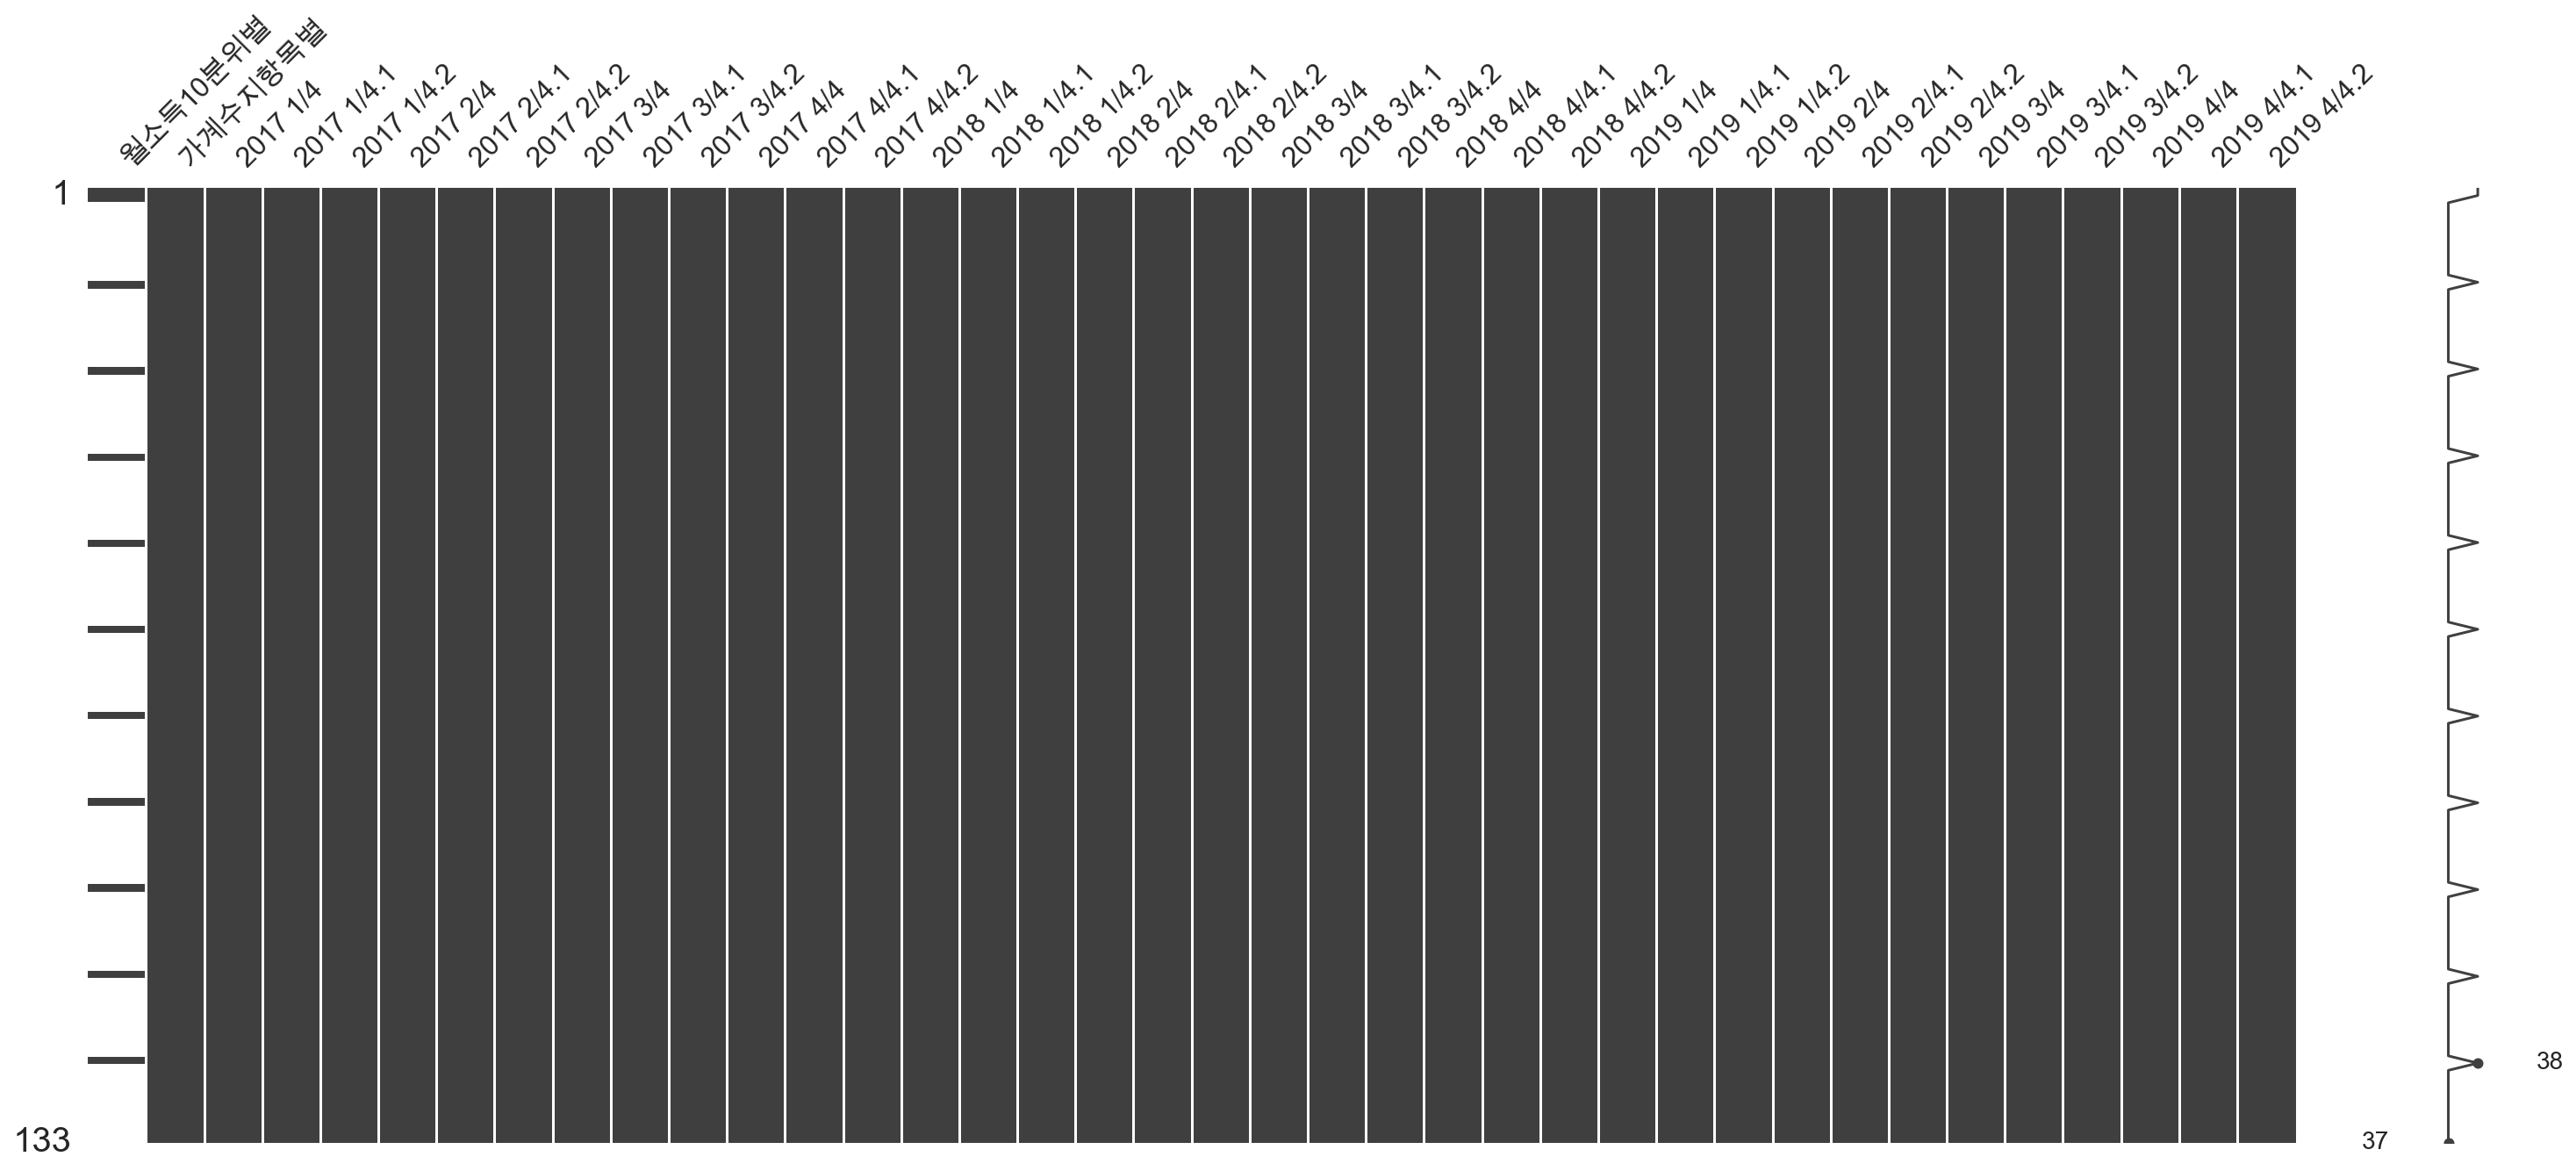

In [5]:
import missingno as msno


msno.matrix(income_raw)

In [6]:
## 이전 데이터로 채우기

income_raw['월소득10분위별'].fillna(method='ffill', inplace=True)
income_raw['월소득10분위별'].unique()

array(['월소득10분위별', '전체  평균', '１분위', '２분위', '３분위', '４분위', '５분위', '６분위',
       '７분위', '８분위', '９분위', '１０분위'], dtype=object)

### '전체 가구' 데이터만 사용
- '근로자 가구' , '근로자 외 가구' 구분 x

In [7]:
income_raw['가계수지항목별'].unique()

array(['가계수지항목별', '가구원수 (명)', '가구주연령 (세)', '가구분포 (%)', '소득 (원)',
       '\u3000경상소득 (원)', '\u3000\u3000근로소득 (원)', '\u3000\u3000사업소득 (원)',
       '\u3000\u3000재산소득 (원)', '\u3000\u3000이전소득 (원)', '\u3000비경상소득 (원)',
       '비소비지출 (원)', '처분가능소득 (원)'], dtype=object)

In [8]:
income_raw['가계수지항목별'] = income_raw['가계수지항목별'].str.strip()
income_raw['가계수지항목별'].unique()

array(['가계수지항목별', '가구원수 (명)', '가구주연령 (세)', '가구분포 (%)', '소득 (원)',
       '경상소득 (원)', '근로소득 (원)', '사업소득 (원)', '재산소득 (원)', '이전소득 (원)',
       '비경상소득 (원)', '비소비지출 (원)', '처분가능소득 (원)'], dtype=object)

In [9]:
income_decile = income_raw.iloc[:,[0,1]].join(income_raw.iloc[:,2::3])
income_decile.drop(0, inplace=True)
income_decile.reset_index(drop=True, inplace=True)
income_decile.head()

,월소득10분위별,가계수지항목별,2017 1/4,2017 2/4,2017 3/4,2017 4/4,2018 1/4,2018 2/4,2018 3/4,2018 4/4,2019 1/4,2019 2/4,2019 3/4,2019 4/4
0,전체 평균,가구원수 (명),3.1,3.11,3.1,3.11,3.07,3.07,3.07,3.08,3.05,3.06,3.05,3.06
1,전체 평균,가구주연령 (세),51.46,51.59,51.76,51.91,52.65,52.77,52.97,53.18,53.39,53.41,53.51,53.68
2,전체 평균,가구분포 (%),100,100,100,100,100,100,100,100,100,100,100,100
3,전체 평균,소득 (원),4593284,4346509,4537192,4445156,4762959,4530510,4747913,4606125,4826323,4704176,4876856,4771921
4,전체 평균,경상소득 (원),4393667,4226579,4451898,4360606,4721445,4492900,4704939,4568356,4802876,4683345,4861134,4751810


In [10]:
income_raw['가계수지항목별'].unique()

array(['가계수지항목별', '가구원수 (명)', '가구주연령 (세)', '가구분포 (%)', '소득 (원)',
       '경상소득 (원)', '근로소득 (원)', '사업소득 (원)', '재산소득 (원)', '이전소득 (원)',
       '비경상소득 (원)', '비소비지출 (원)', '처분가능소득 (원)'], dtype=object)

In [11]:
income_decile.head(13)

,월소득10분위별,가계수지항목별,2017 1/4,2017 2/4,2017 3/4,2017 4/4,2018 1/4,2018 2/4,2018 3/4,2018 4/4,2019 1/4,2019 2/4,2019 3/4,2019 4/4
0,전체 평균,가구원수 (명),3.1,3.11,3.1,3.11,3.07,3.07,3.07,3.08,3.05,3.06,3.05,3.06
1,전체 평균,가구주연령 (세),51.46,51.59,51.76,51.91,52.65,52.77,52.97,53.18,53.39,53.41,53.51,53.68
2,전체 평균,가구분포 (%),100,100,100,100,100,100,100,100,100,100,100,100
3,전체 평균,소득 (원),4593284,4346509,4537192,4445156,4762959,4530510,4747913,4606125,4826323,4704176,4876856,4771921
4,전체 평균,경상소득 (원),4393667,4226579,4451898,4360606,4721445,4492900,4704939,4568356,4802876,4683345,4861134,4751810
5,전체 평균,근로소득 (원),3021516,2877789,3066965,2931672,3204721,3031393,3206056,3114724,3220792,3169168,3360953,3296610
6,전체 평균,사업소득 (원),856071,891494,915875,942924,904841,925031,925613,911305,892180,908517,879825,891599
7,전체 평균,재산소득 (원),21578,17315,18820,18449,22317,23273,20563,19353,16511,24909,20051,21490
8,전체 평균,이전소득 (원),494502,439980,450239,467561,589566,513203,552707,522974,673393,580751,600305,542111
9,전체 평균,비경상소득 (원),199617,119931,85294,84550,41513,37610,42974,37770,23447,20831,15722,20111


In [12]:
income_decile_t = income_decile.T.reset_index()
income_decile_t.columns = income_decile_t.iloc[1]
income_decile_t = income_decile_t.drop(1)
income_decile_t

1,가계수지항목별,가구원수 (명),가구주연령 (세),가구분포 (%),소득 (원),경상소득 (원),근로소득 (원),사업소득 (원),재산소득 (원),이전소득 (원),...,가구분포 (%),소득 (원),경상소득 (원),근로소득 (원),사업소득 (원),재산소득 (원),이전소득 (원),비경상소득 (원),비소비지출 (원),처분가능소득 (원)
0,월소득10분위별,전체 평균,전체 평균,전체 평균,전체 평균,전체 평균,전체 평균,전체 평균,전체 평균,전체 평균,...,１０분위,１０분위,１０분위,１０분위,１０분위,１０분위,１０분위,１０분위,１０분위,１０분위
2,2017 1/4,3.1,51.46,100,4593284,4393667,3021516,856071,21578,494502,...,10.01,11492400,10702424,8500903,1619174,64327,518019,789977,2268689,9223712
3,2017 2/4,3.11,51.59,100,4346509,4226579,2877789,891494,17315,439980,...,10.01,9872360,9419566,6610369,2348446,40111,420639,452794,1989200,7883161
4,2017 3/4,3.1,51.76,100,4537192,4451898,3066965,915875,18820,450239,...,10.02,10823870,10487847,7878819,2129751,51621,427656,336023,2121897,8701973
5,2017 4/4,3.11,51.91,100,4445156,4360606,2931672,942924,18449,467561,...,10.01,10056619,9856306,6967736,2381766,44166,462637,200313,2152913,7903706
6,2018 1/4,3.07,52.65,100,4762959,4721445,3204721,904841,22317,589566,...,10,12717465,12546859,9900505,1896683,39406,710265,170605,2930371,9787093
7,2018 2/4,3.07,52.77,100,4530510,4492900,3031393,925031,23273,513203,...,10.04,11134309,10895271,8082380,2308867,63595,440429,239039,2528560,8605749
8,2018 3/4,3.07,52.97,100,4747913,4704939,3206056,925613,20563,552707,...,10.01,11800114,11468442,8652942,2295836,36972,482692,331672,2857759,8942354
9,2018 4/4,3.08,53.18,100,4606125,4568356,3114724,911305,19353,522974,...,10.03,11357920,11093107,8370549,2282092,38236,402230,264813,2531684,8826236
10,2019 1/4,3.05,53.39,100,4826323,4802876,3220792,892180,16511,673393,...,10.02,11986489,11887703,9099020,1903509,32244,852929,98786,2981543,9004945


In [13]:
type(list(income_decile_t.columns.unique()))

list

In [14]:
type(income_decile_t.columns.unique()[1])

str

## 분위별 그래프 그려보기

In [15]:
mpl.rcParams['figure.figsize'] = (16, 10)
mpl.rcParams["legend.loc"] = 'best'

In [16]:
## 소득
income_decile_tmp = income_decile_t.loc[:,income_decile_t.columns =='사업소득 (원)'].join(income_decile_t['가계수지항목별'])
income_decile_tmp.head()
# decile_incm.set_index('월소득10분위별',drop=True, inplace=True)
# decile_incm.head()

,사업소득 (원),사업소득 (원),사업소득 (원),사업소득 (원),사업소득 (원),사업소득 (원),사업소득 (원),사업소득 (원),사업소득 (원),사업소득 (원),사업소득 (원),가계수지항목별
0,전체 평균,１분위,２분위,３분위,４분위,５분위,６분위,７분위,８분위,９분위,１０분위,월소득10분위별
2,856071,91299,415711,491860,734751,844822,1006615,994370,1126656,1232411,1619174,2017 1/4
3,891494,133816,357581,499514,721478,744060,988769,1048492,990090,1079603,2348446,2017 2/4
4,915875,128091,369455,510617,705665,1003602,972134,822322,1159667,1347600,2129751,2017 3/4
5,942924,145401,308013,618461,684676,837582,1118551,1017230,1151663,1162910,2381766,2017 4/4


In [17]:
income_decile_tmp.columns = income_decile_tmp.iloc[0]
income_decile_tmp = income_decile_tmp.drop(0)
income_decile_tmp

,전체 평균,１분위,２분위,３분위,４분위,５분위,６분위,７분위,８분위,９분위,１０분위,월소득10분위별
2,856071,91299,415711,491860,734751,844822,1006615,994370,1126656,1232411,1619174,2017 1/4
3,891494,133816,357581,499514,721478,744060,988769,1048492,990090,1079603,2348446,2017 2/4
4,915875,128091,369455,510617,705665,1003602,972134,822322,1159667,1347600,2129751,2017 3/4
5,942924,145401,308013,618461,684676,837582,1118551,1017230,1151663,1162910,2381766,2017 4/4
6,904841,93846,281564,524844,739039,771731,1084216,993350,1214534,1446238,1896683,2018 1/4
7,925031,81159,307115,509350,651702,618946,991997,1108440,1250677,1417053,2308867,2018 2/4
8,925613,87522,344165,497305,700883,805902,935009,1180309,1176814,1230139,2295836,2018 3/4
9,911305,79059,335633,472733,585924,939090,880152,973751,1252368,1306986,2282092,2018 4/4
10,892180,74770,339761,491355,744542,897475,1024647,992059,1076513,1374508,1903509,2019 1/4
11,908517,80996,368568,550064,728328,768791,907021,1004839,963433,1469312,2241366,2019 2/4


In [24]:
income_decile_tmp.columns

Index(['전체  평균', '１분위', '２분위', '３분위', '４분위', '５분위', '６분위', '７분위', '８분위', '９분위',
       '１０분위', '월소득10분위별'],
      dtype='object', name=0)

<AxesSubplot:xlabel='월소득10분위별'>

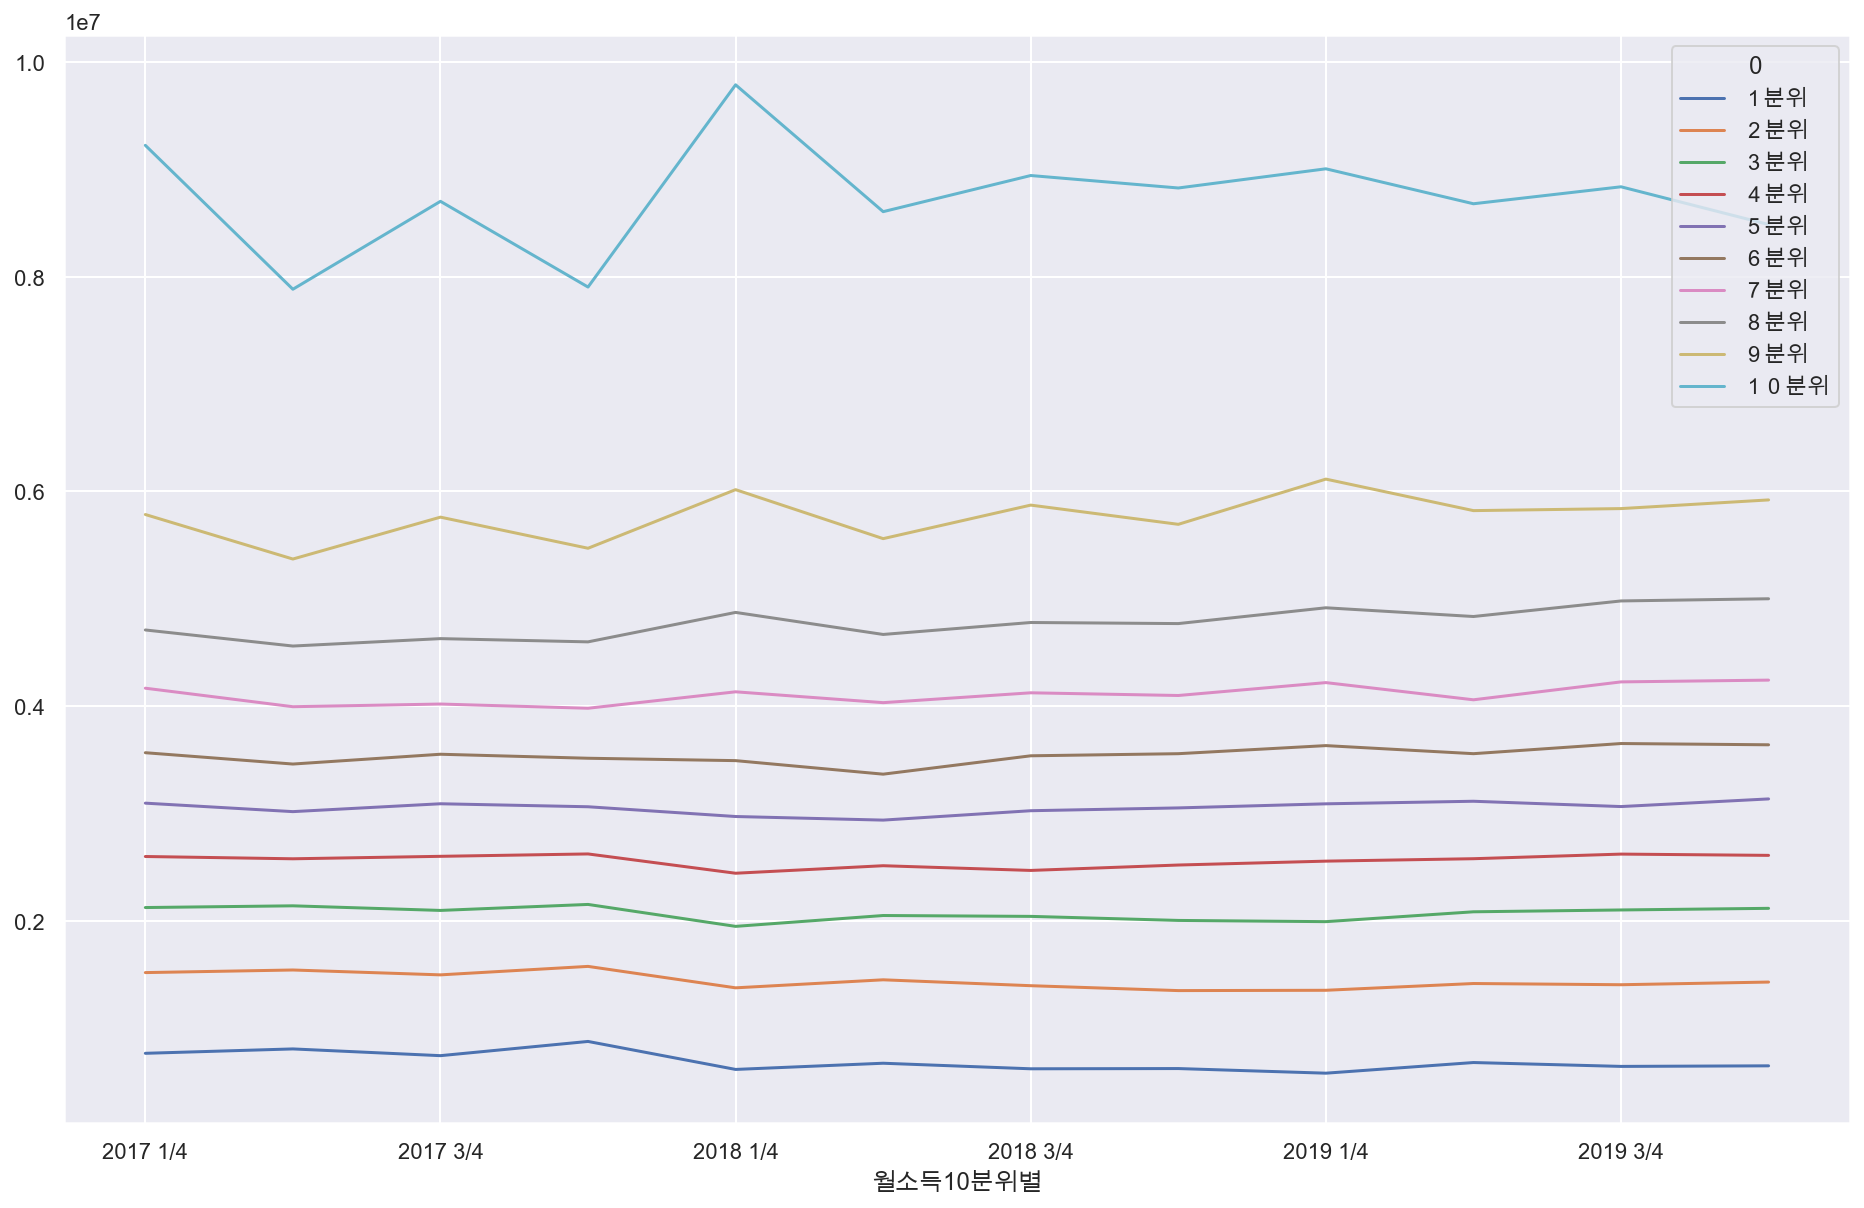

In [25]:
income_decile_tmp = income_decile_tmp.drop(columns='전체  평균')
income_decile_tmp.plot(x='월소득10분위별')

## 반복

In [19]:
index_list = income_decile_t.columns.unique().drop('가계수지항목별')

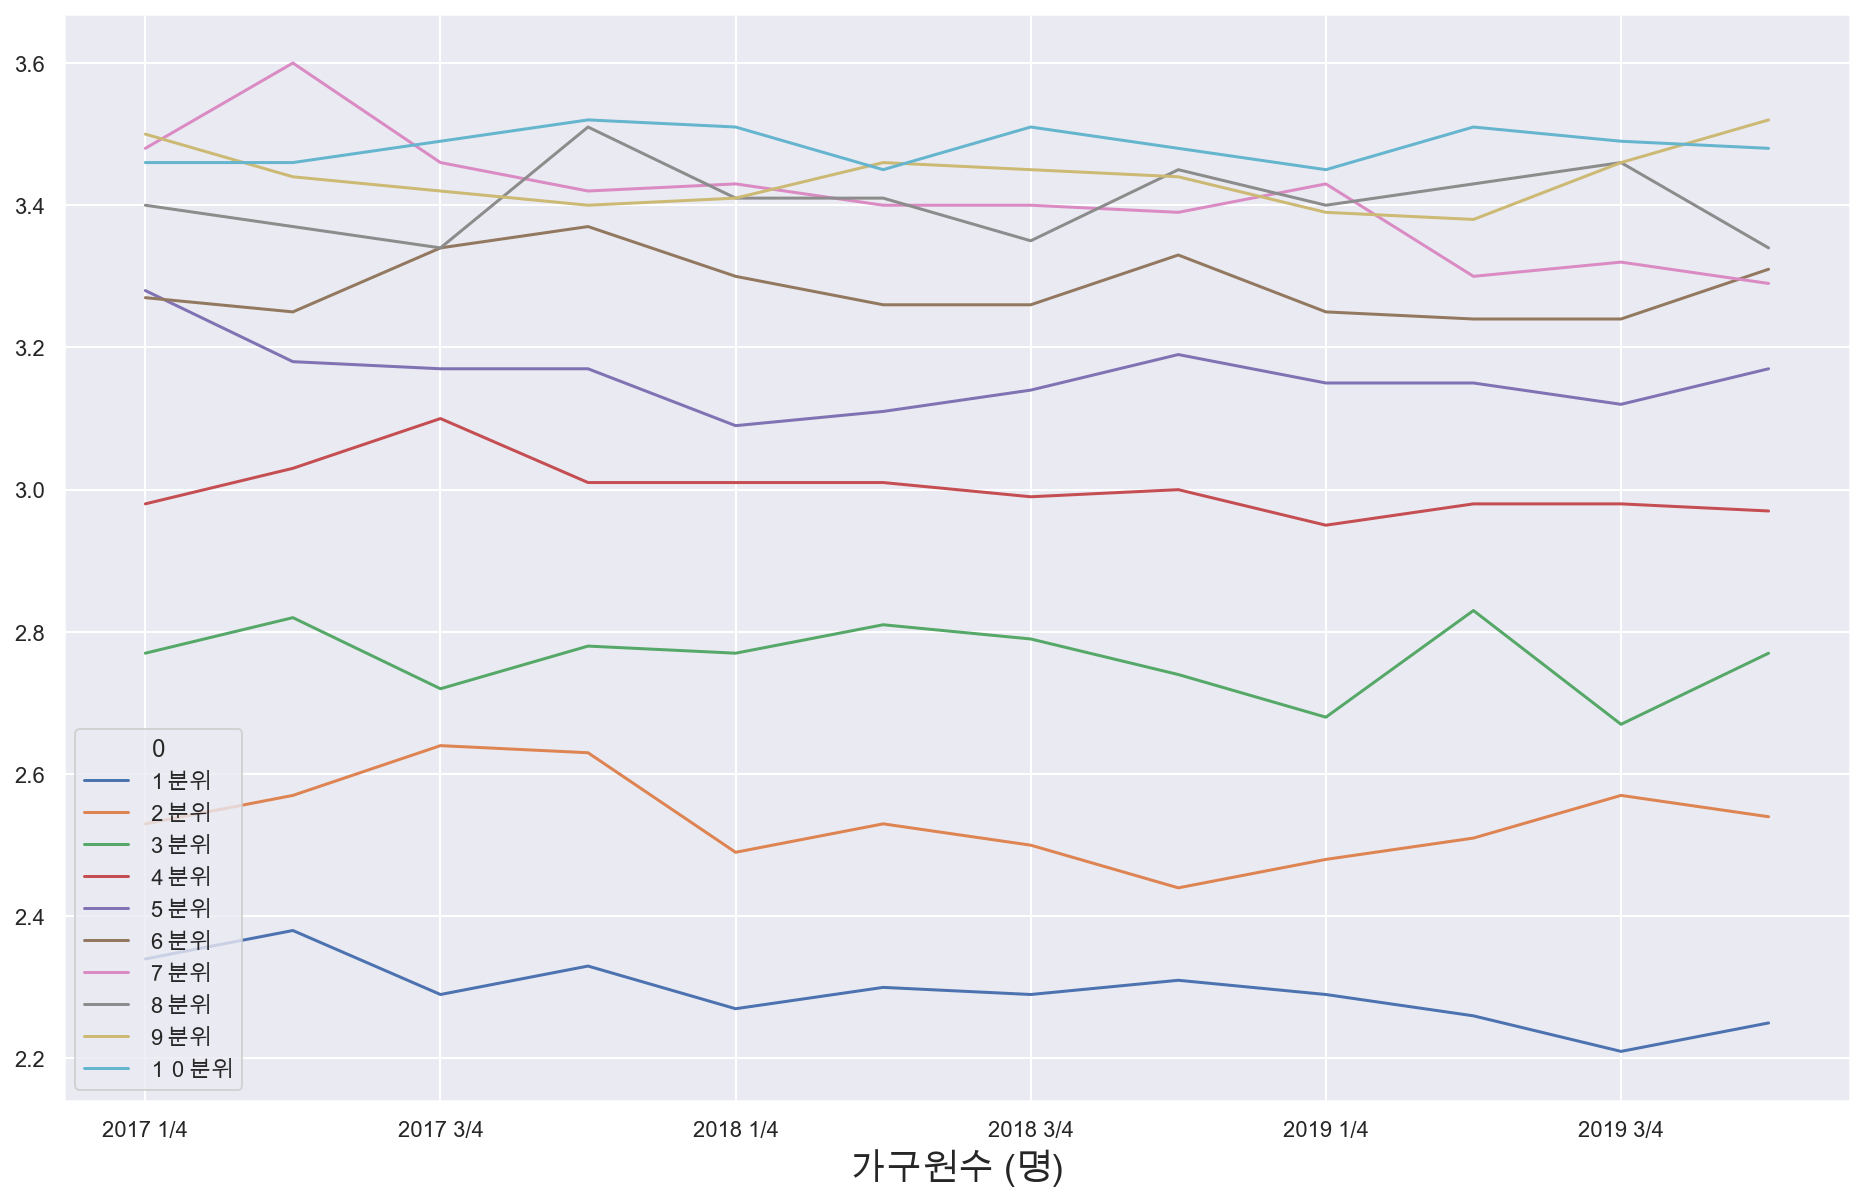

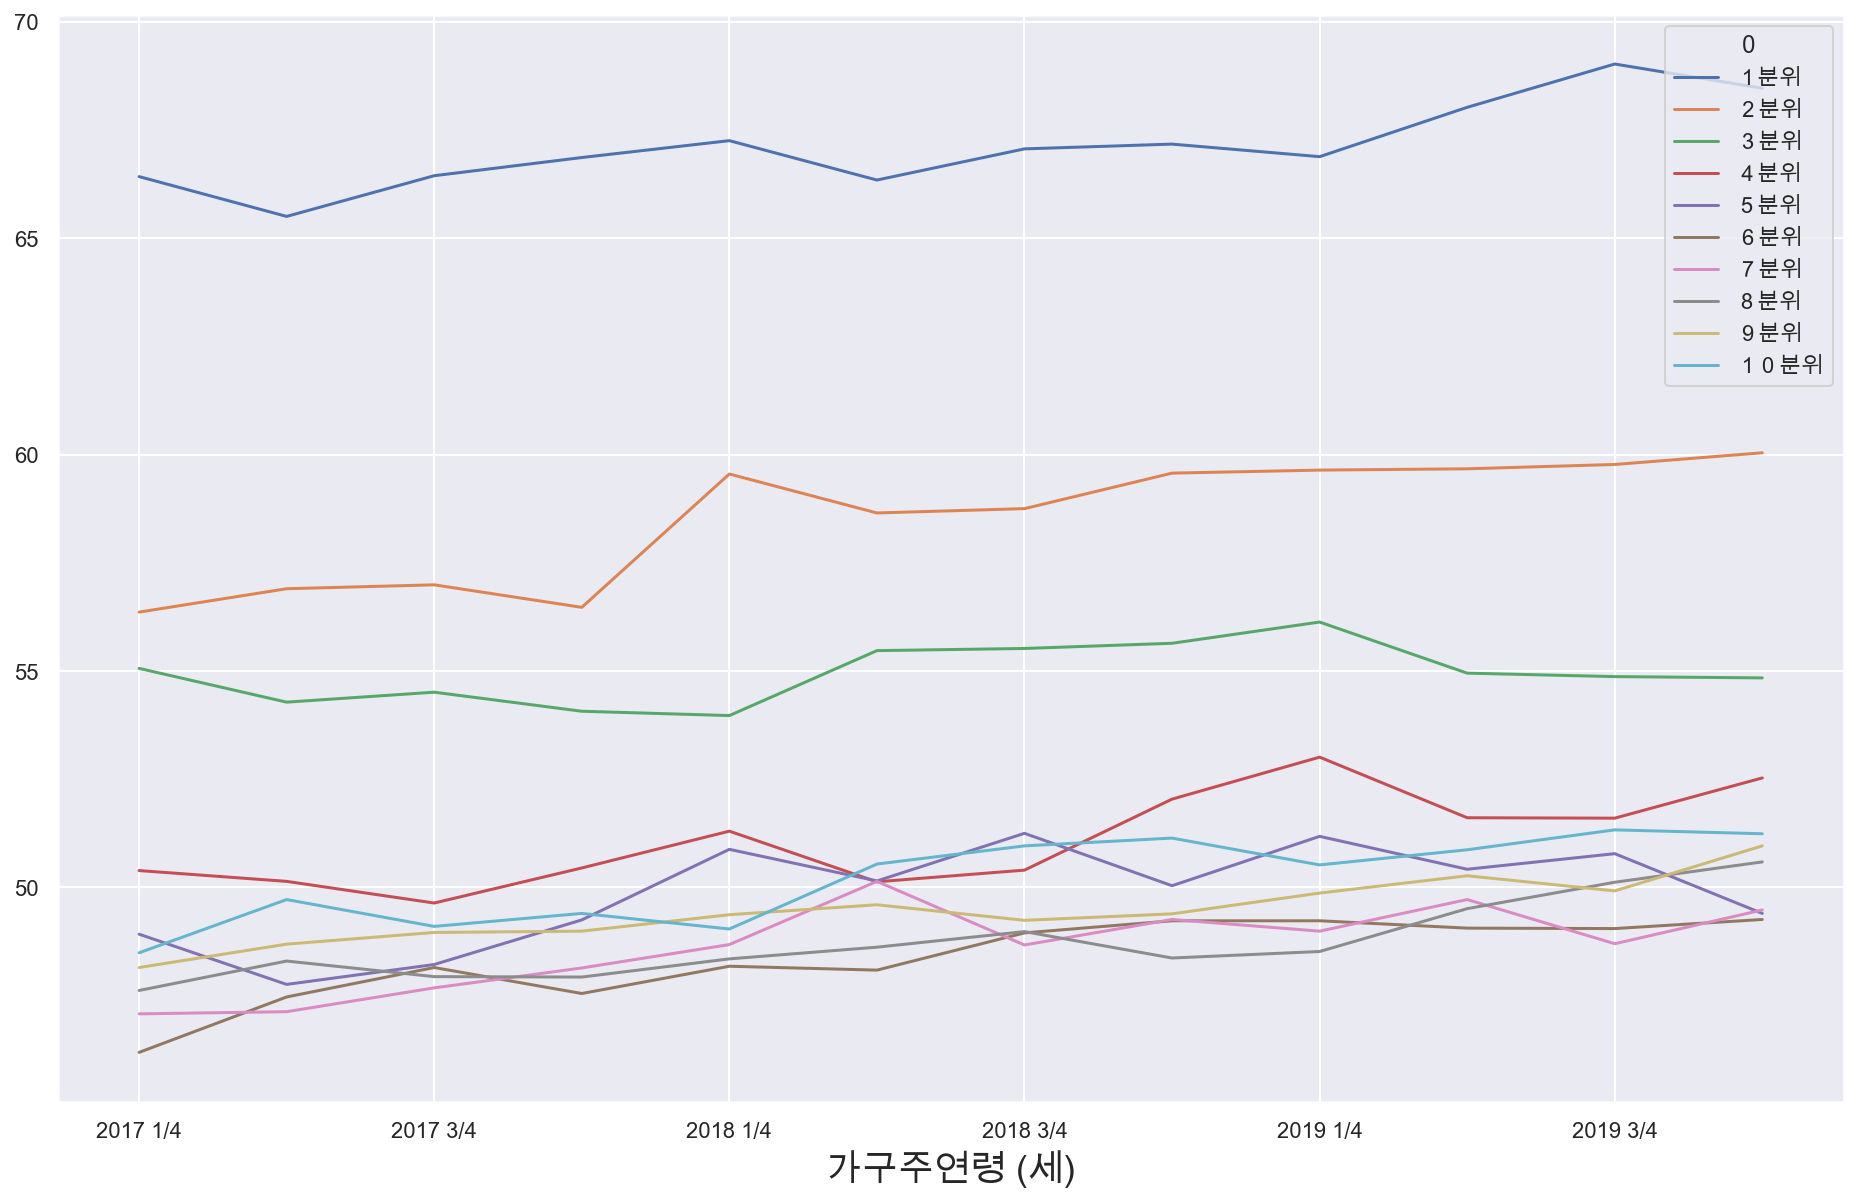

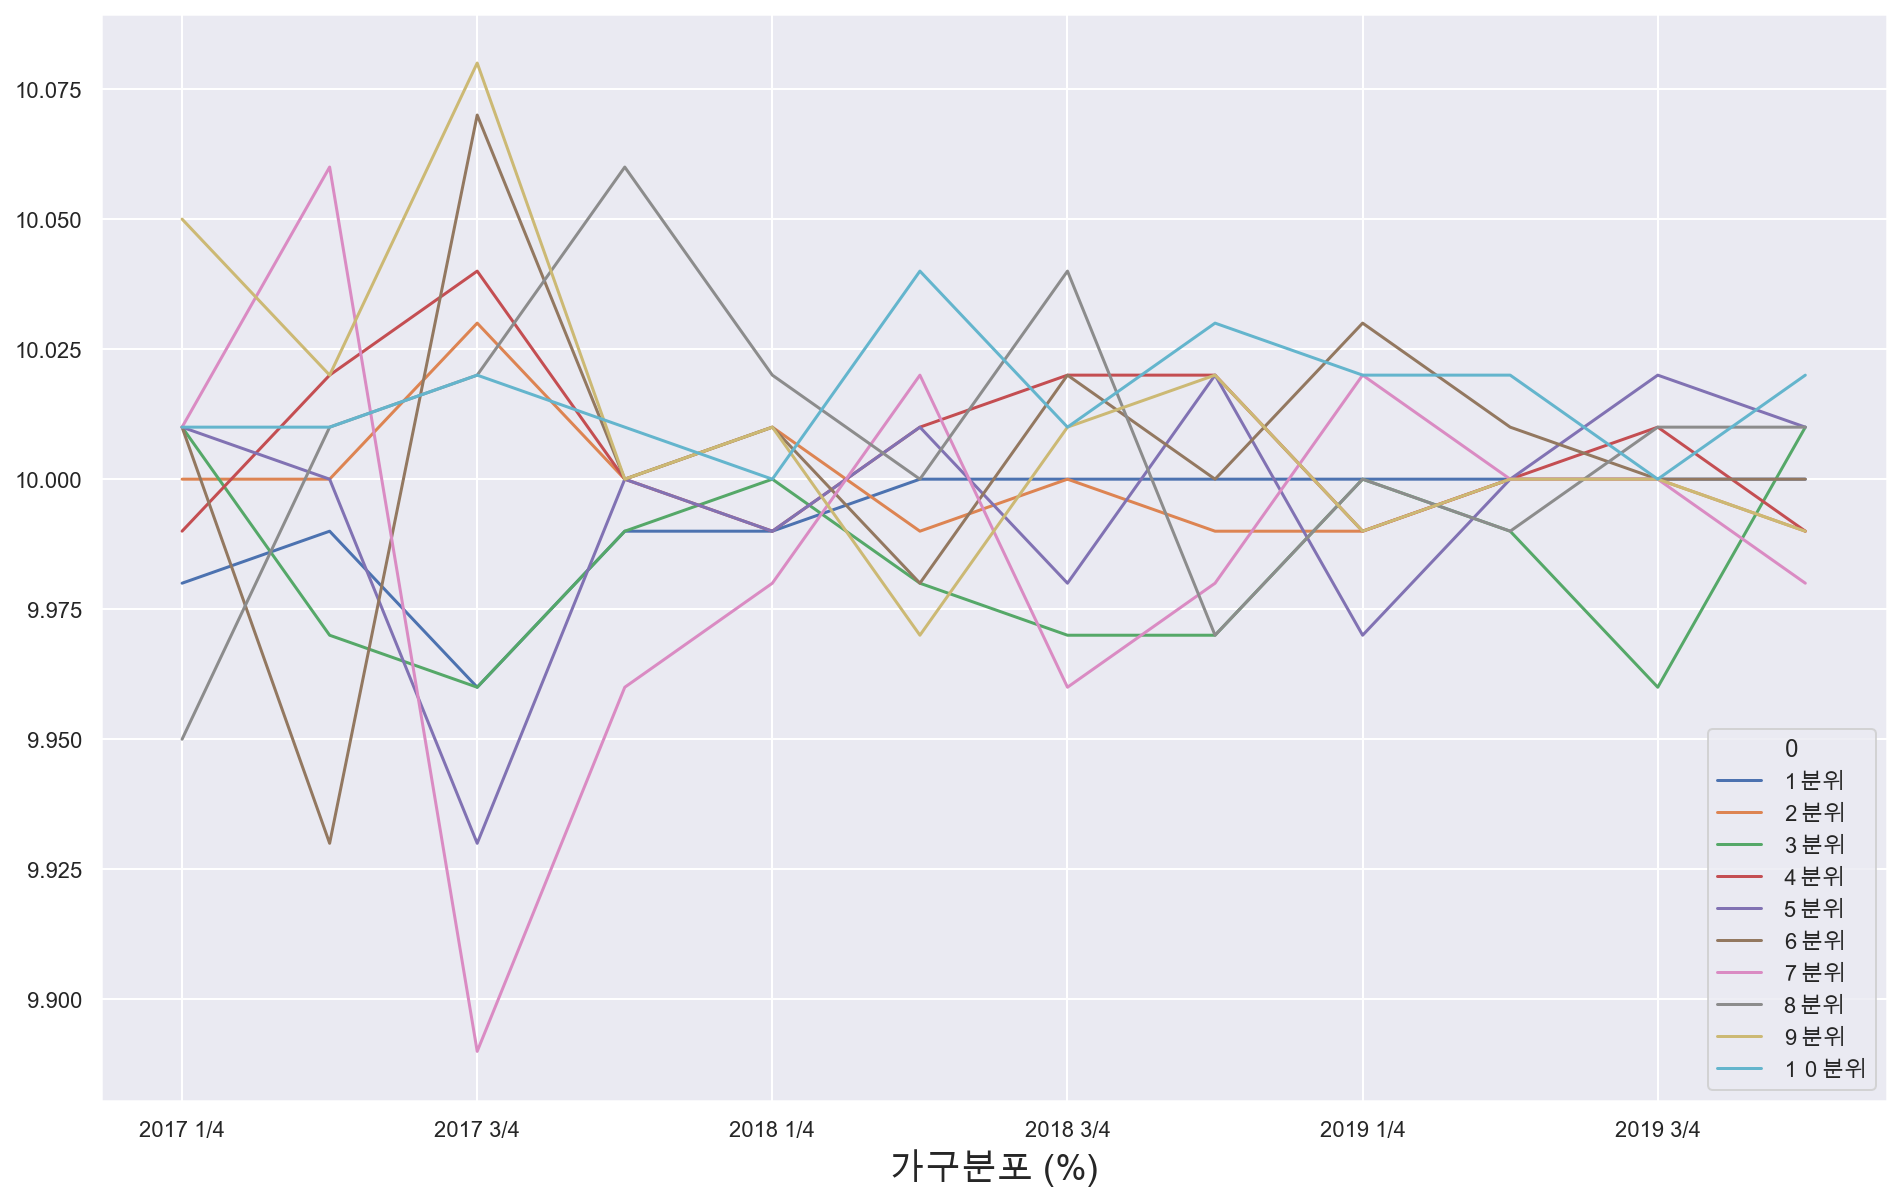

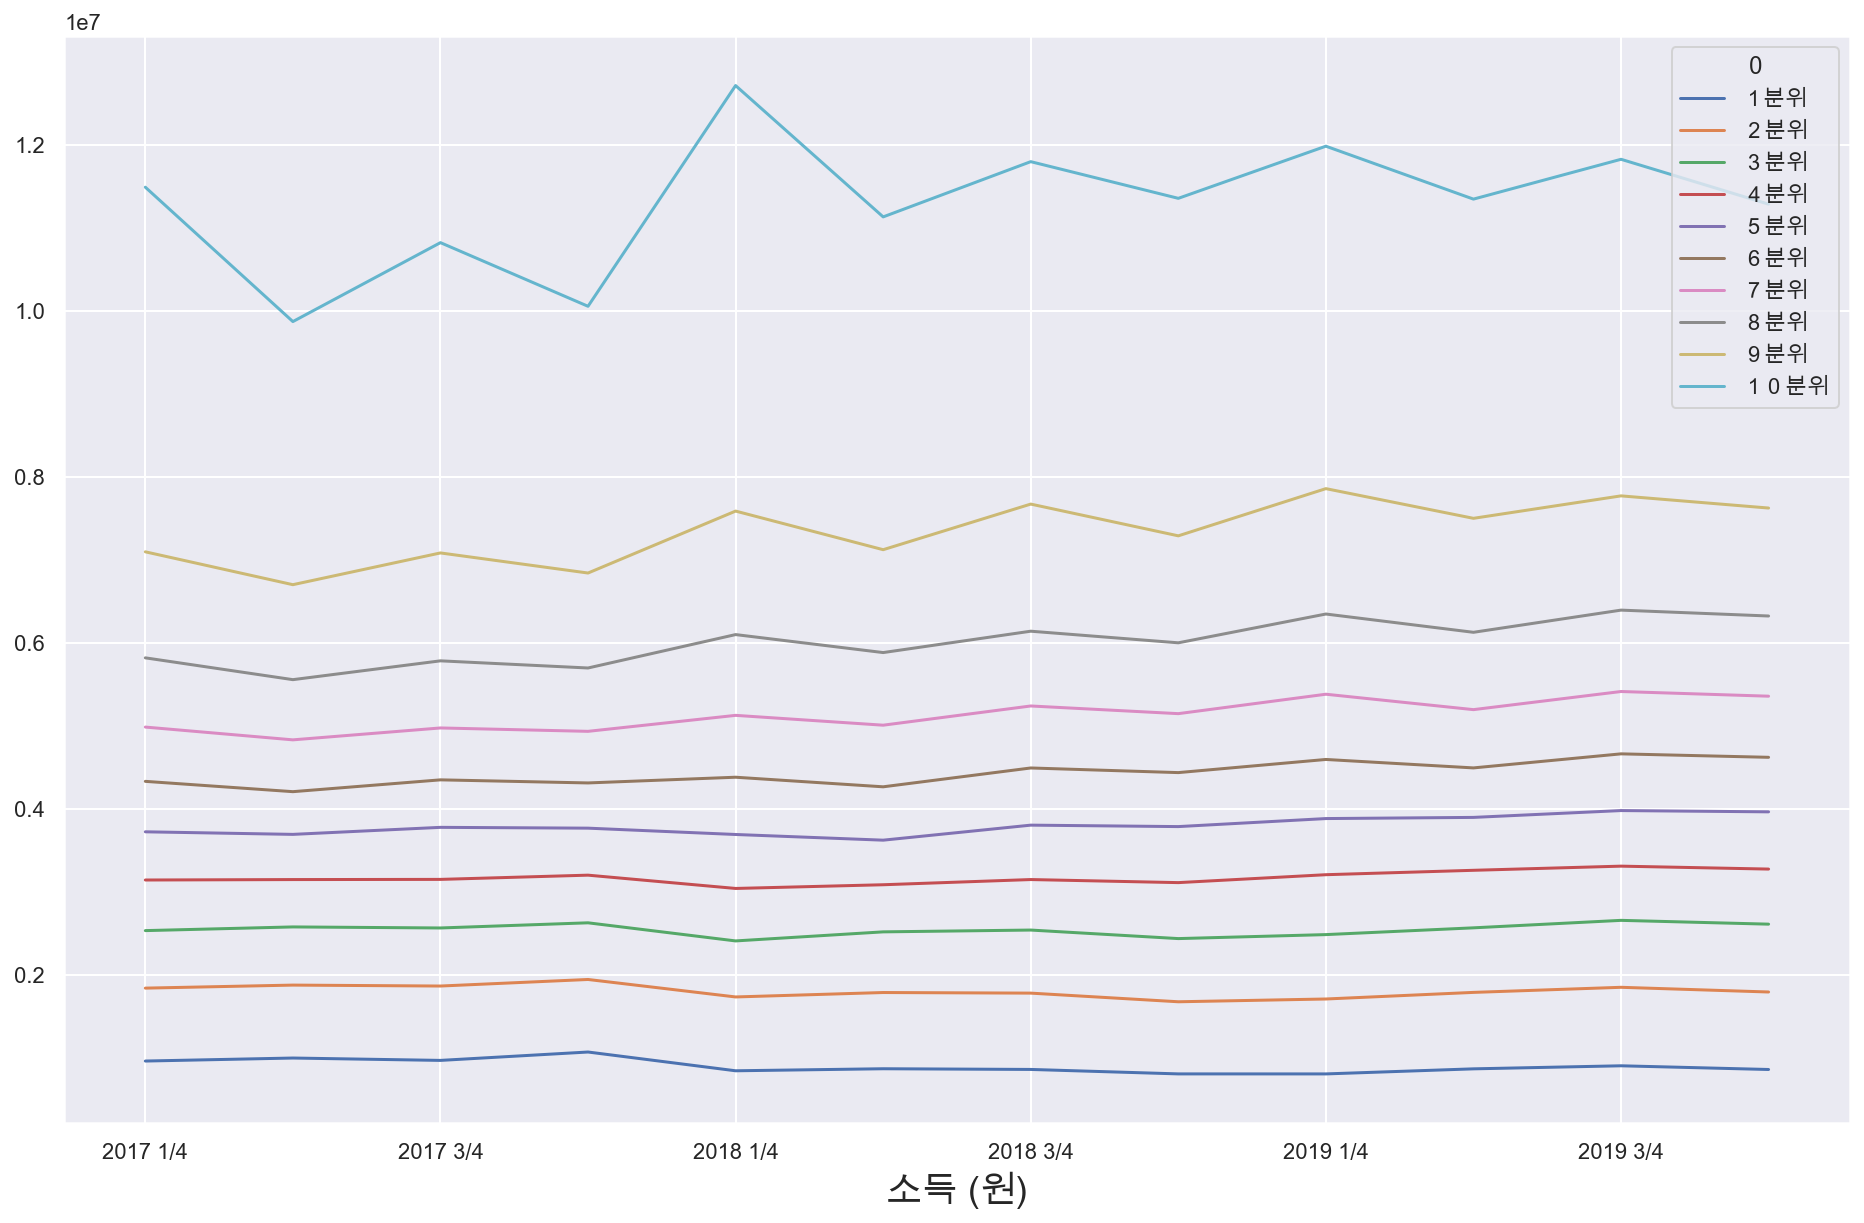

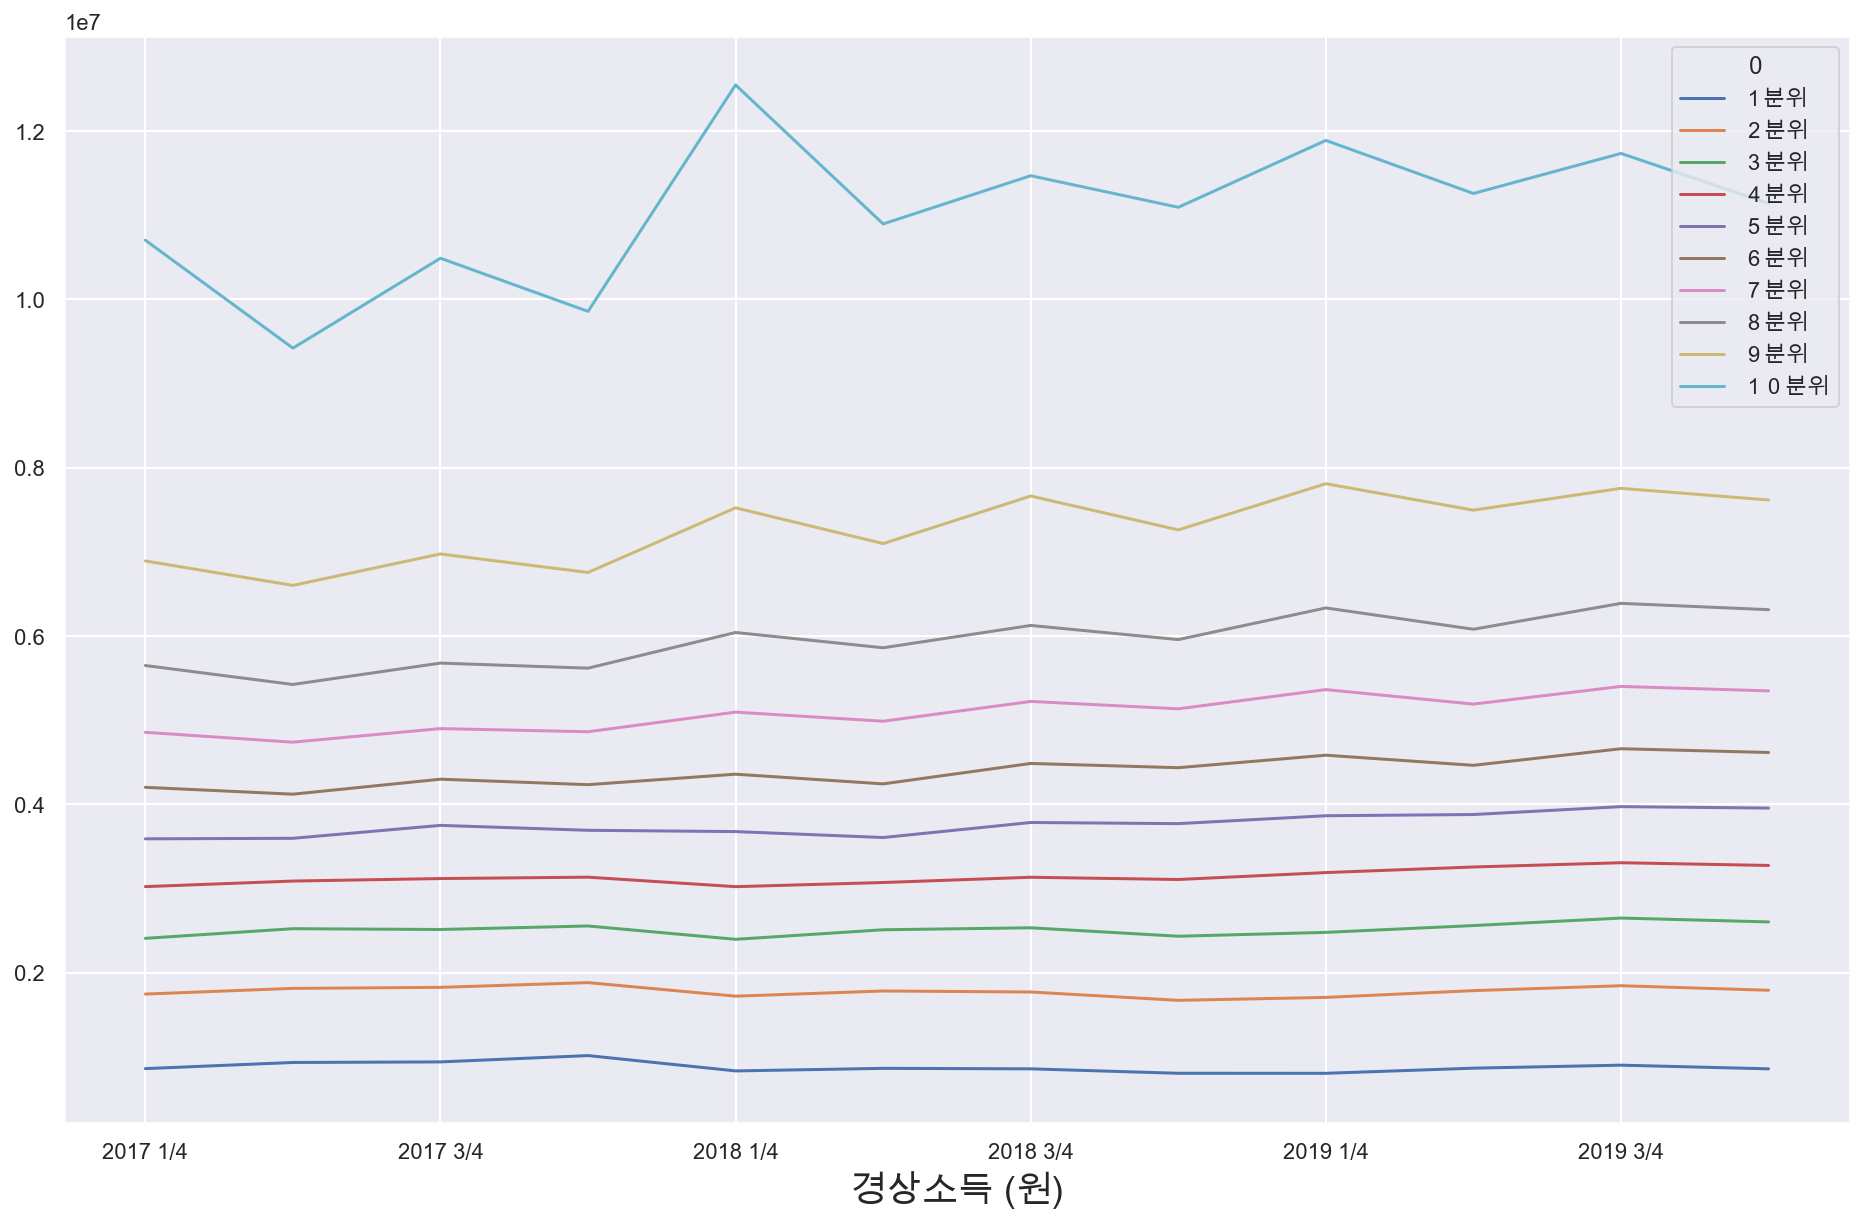

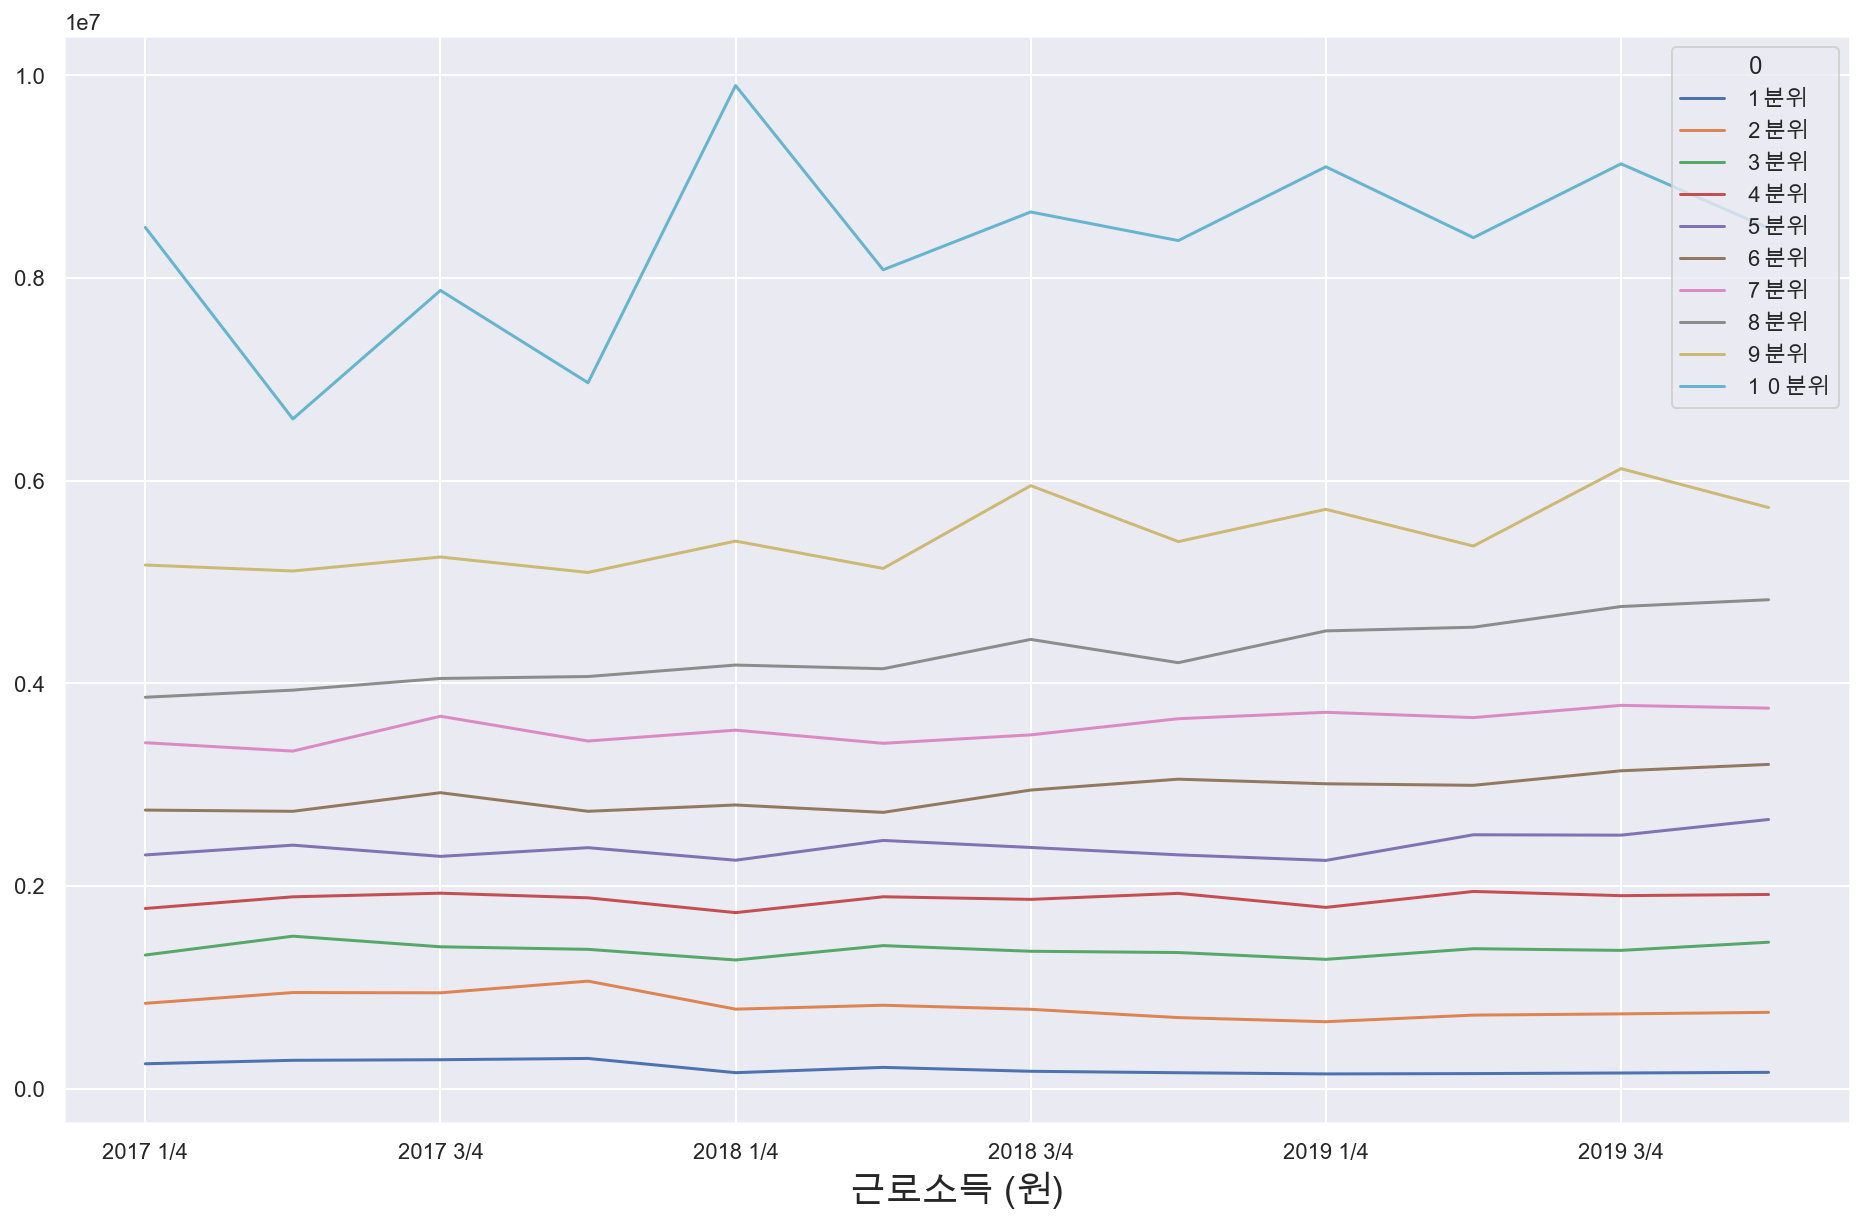

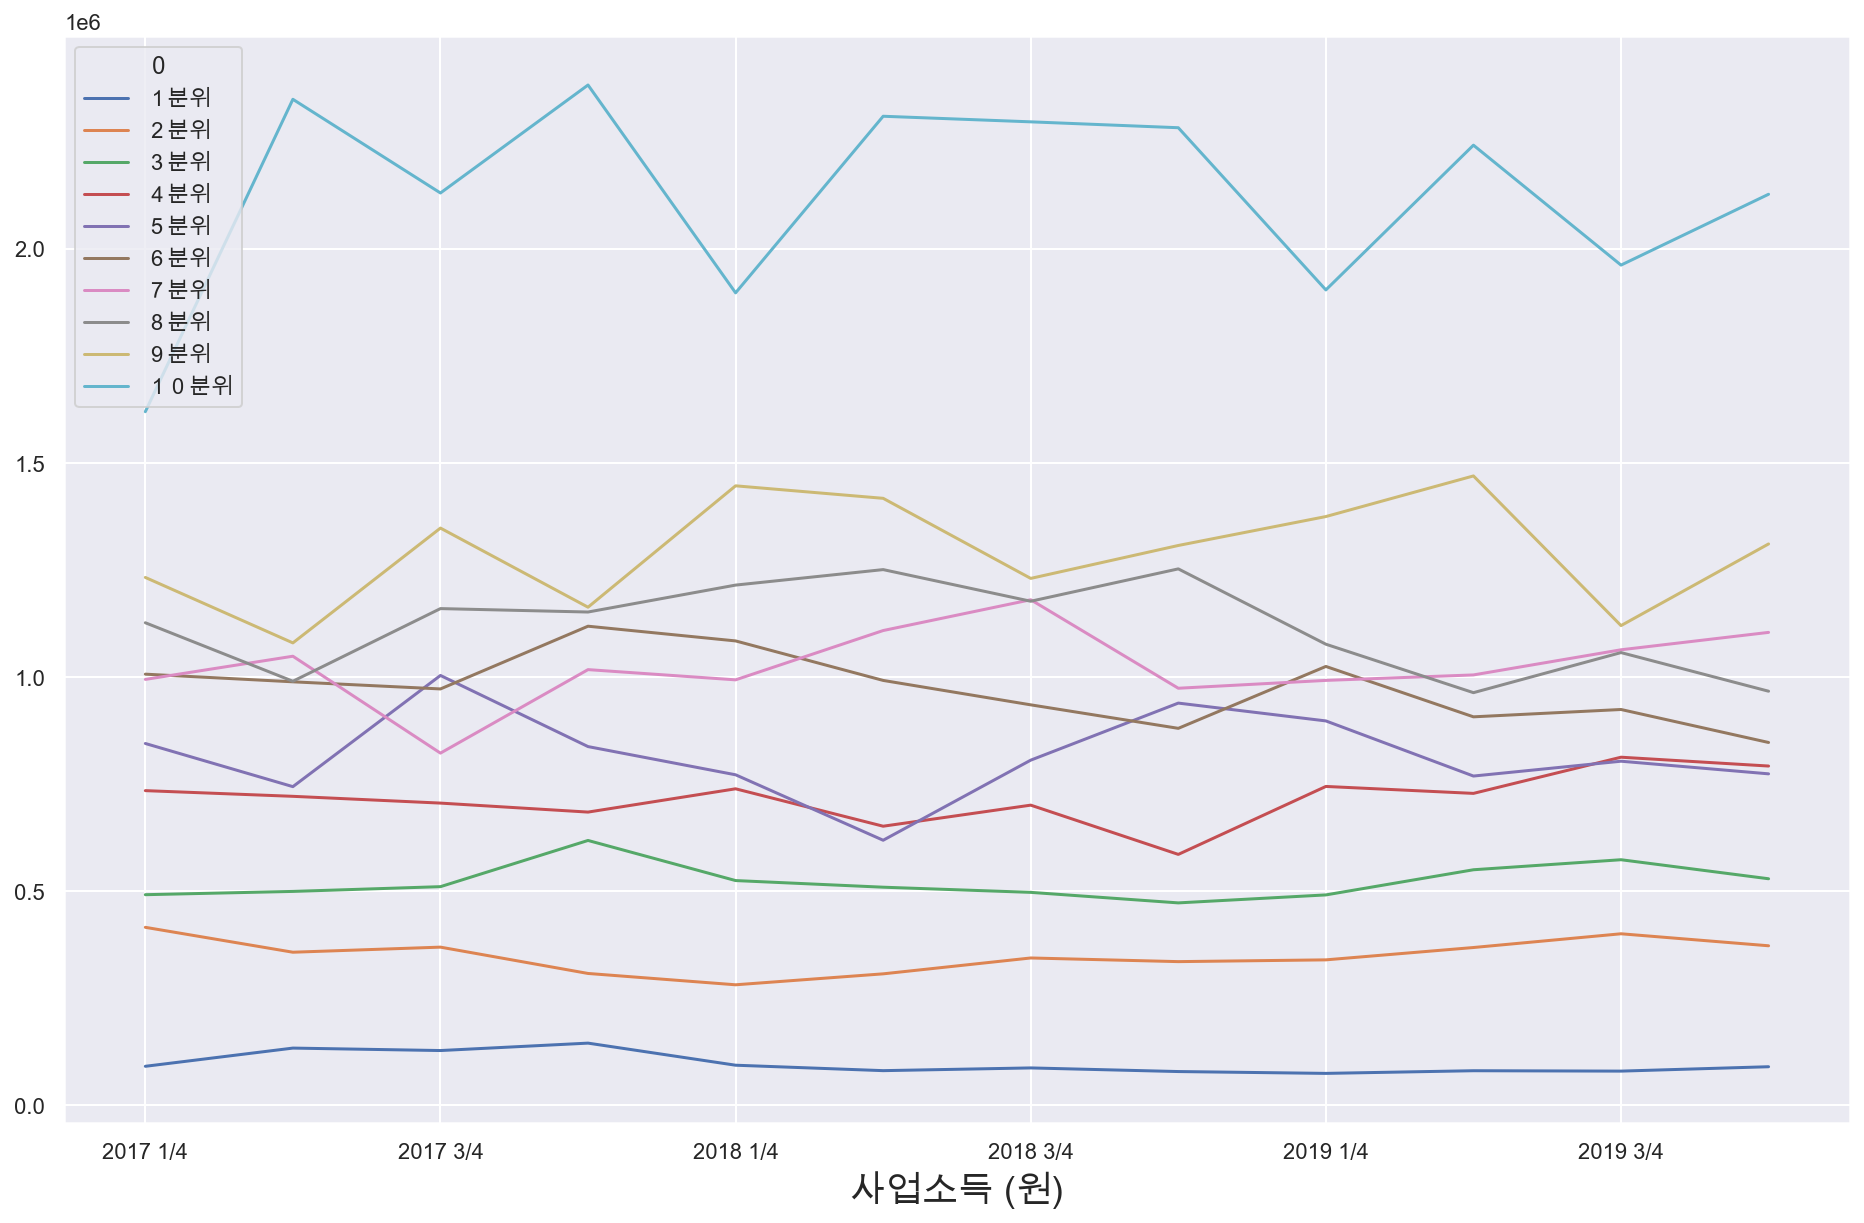

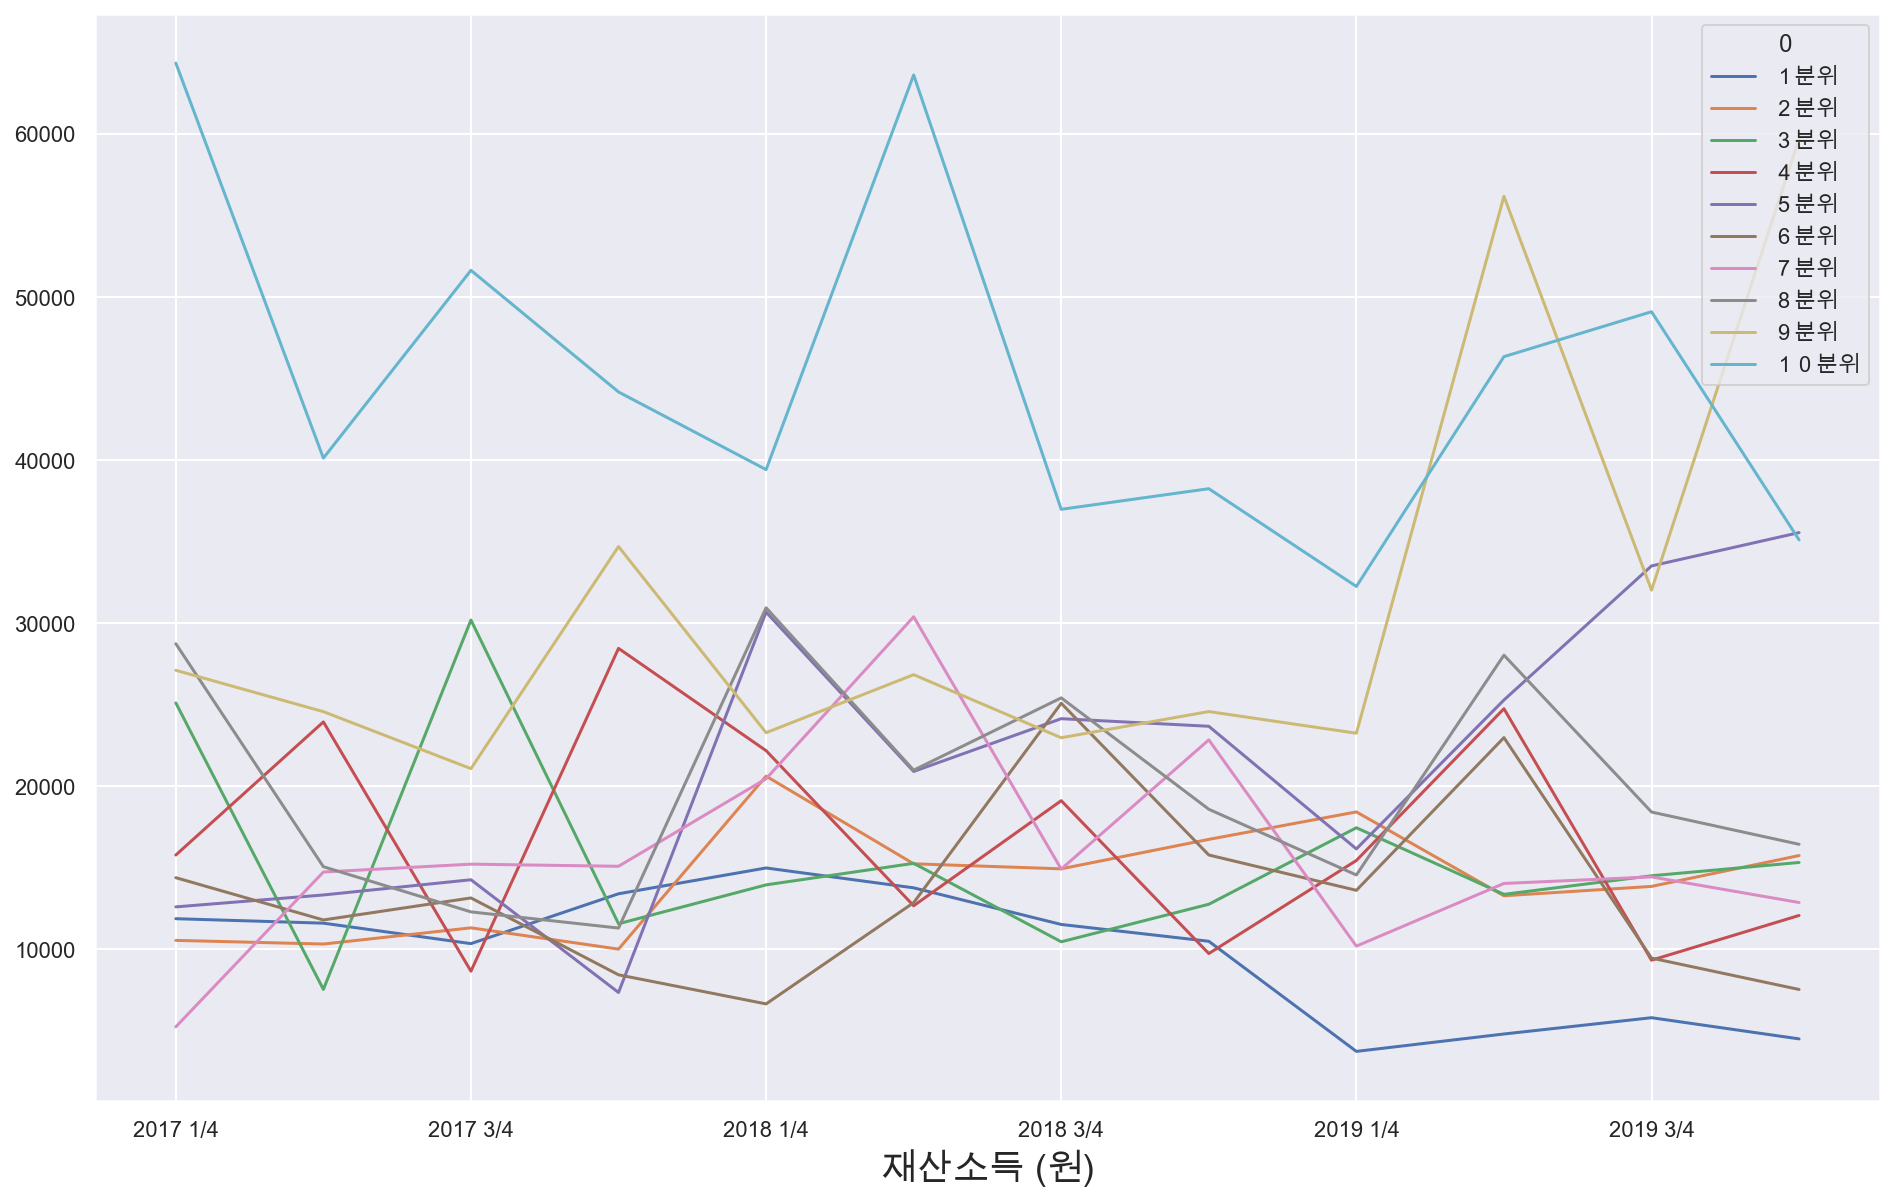

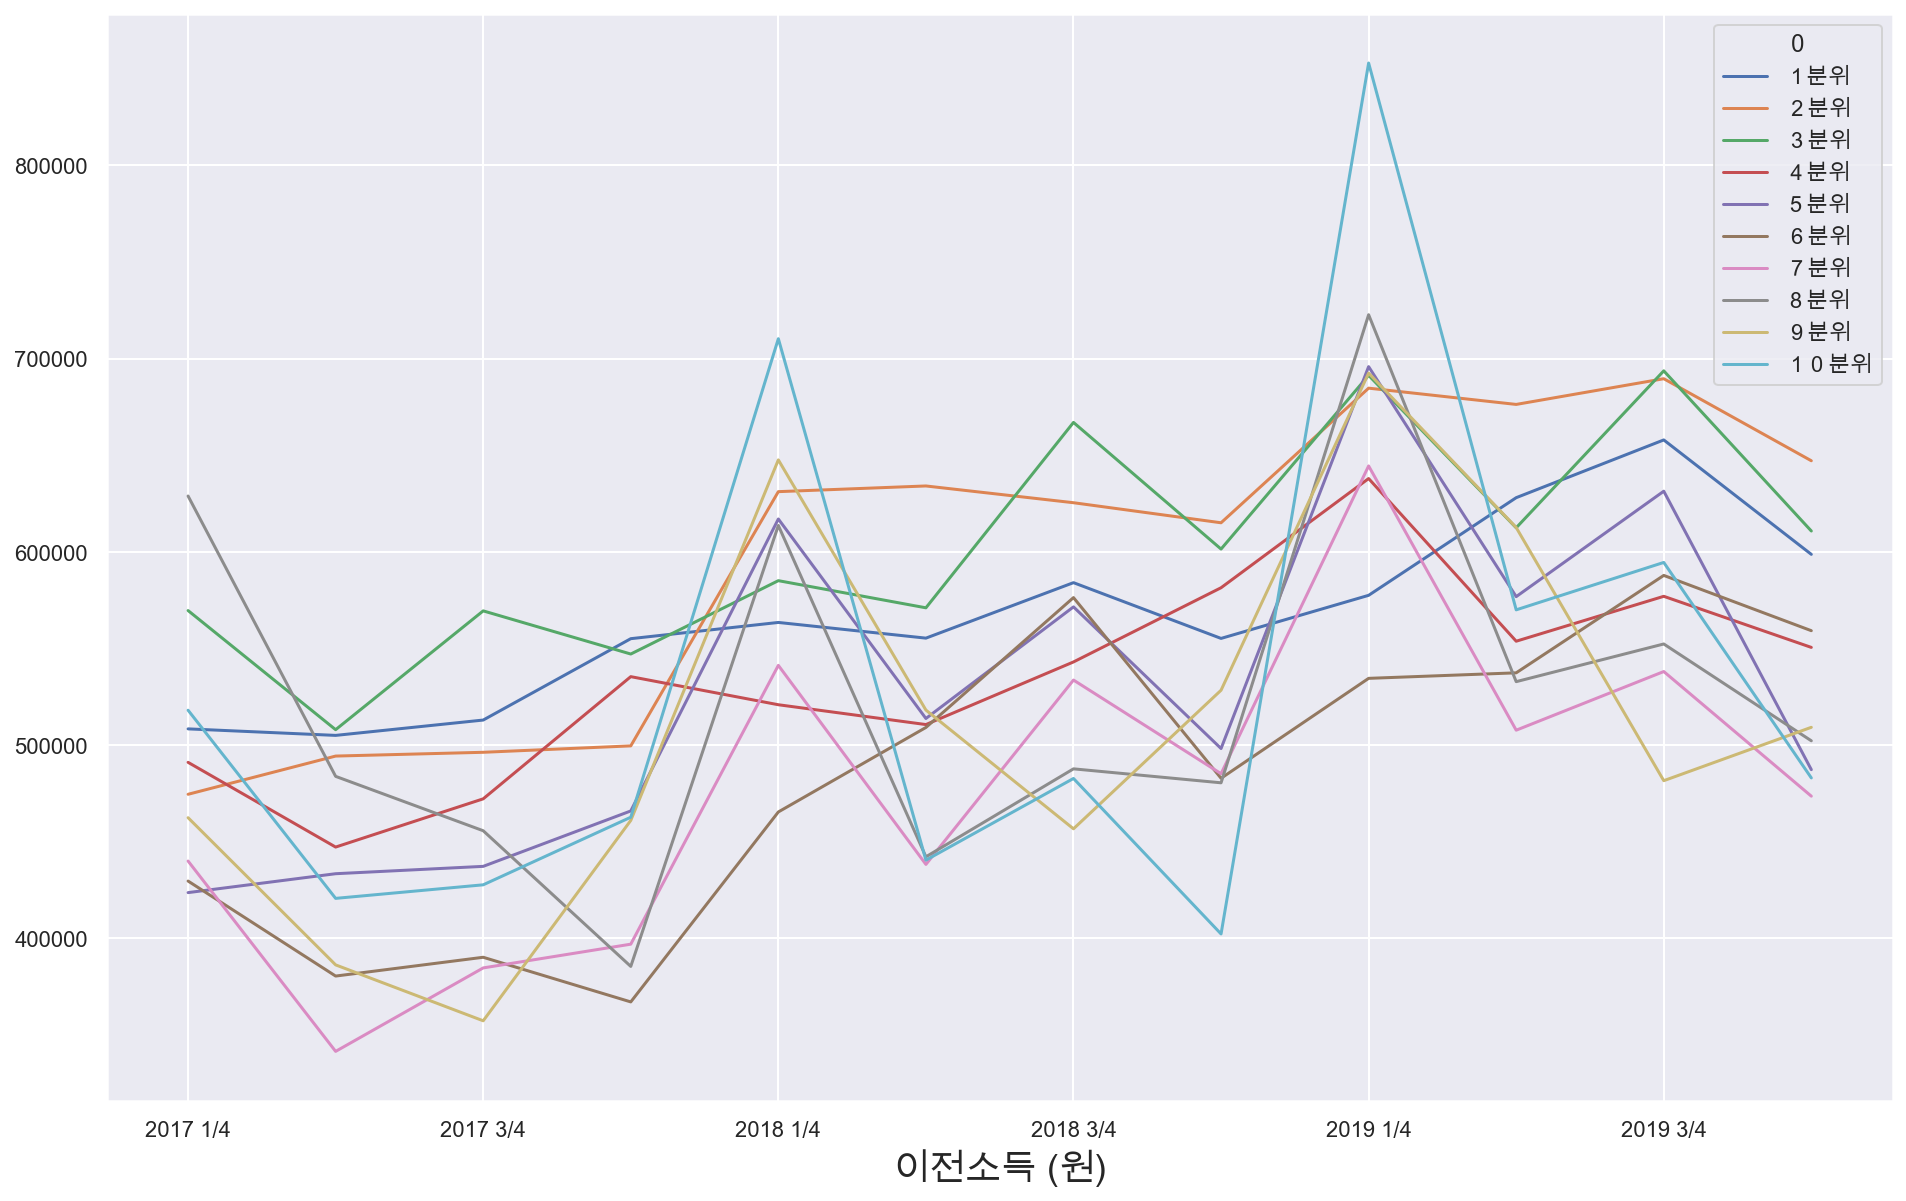

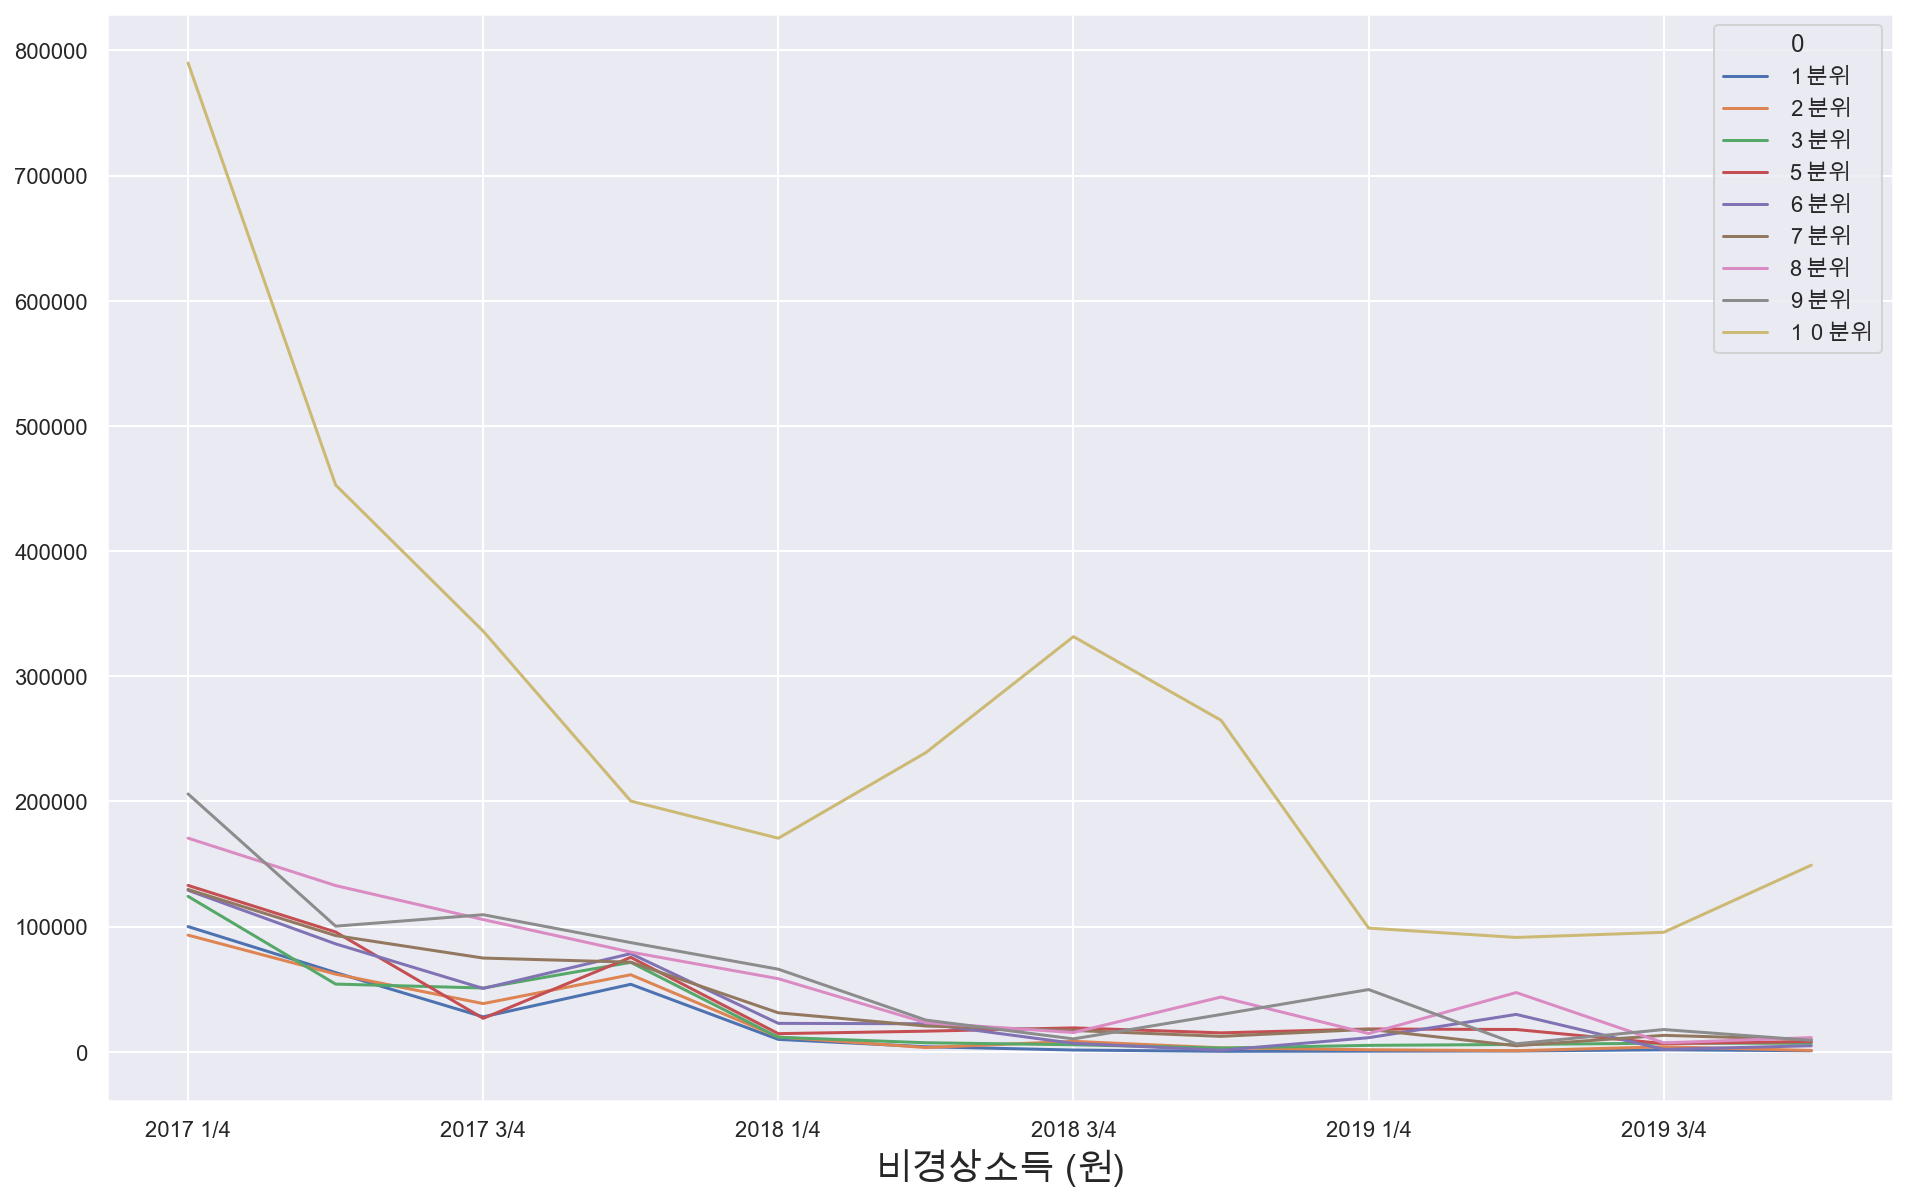

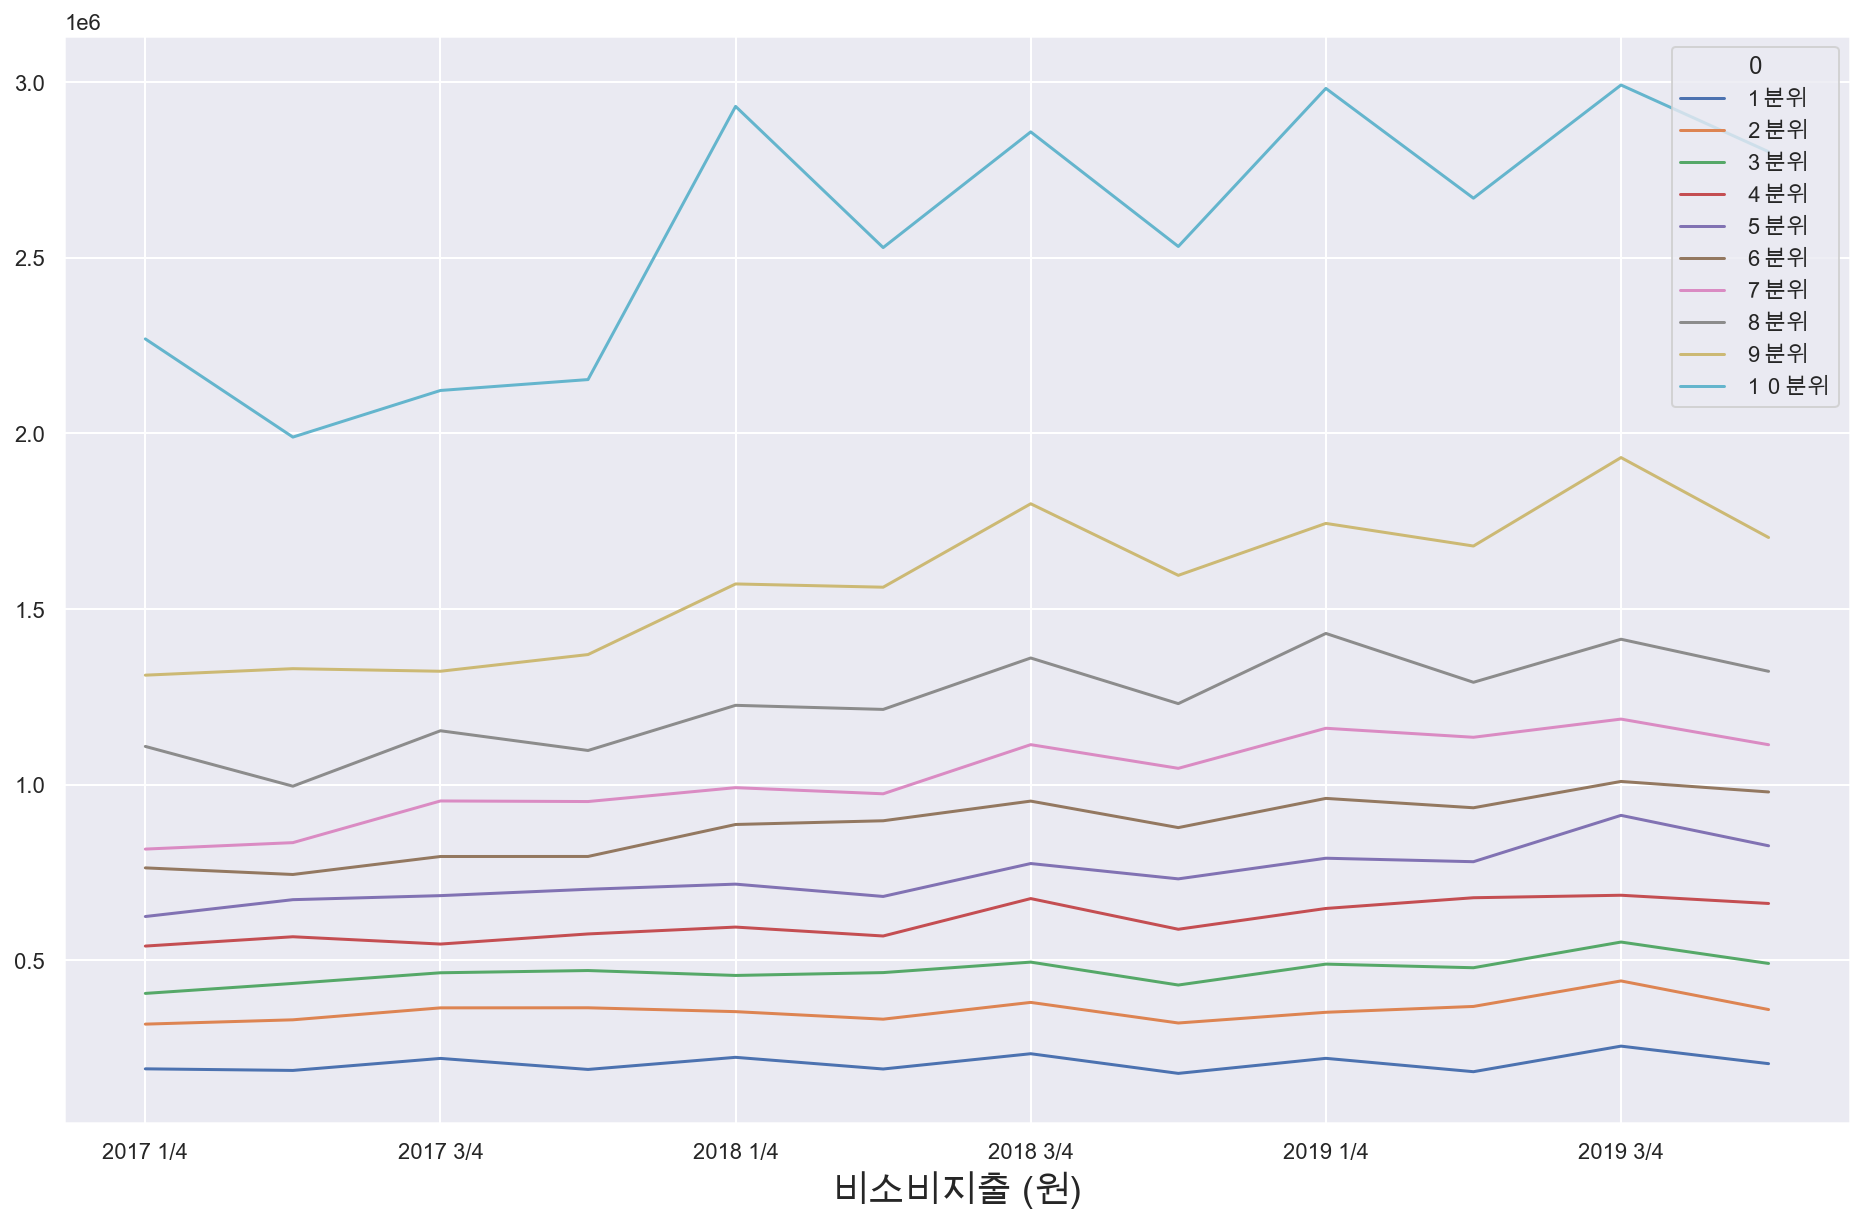

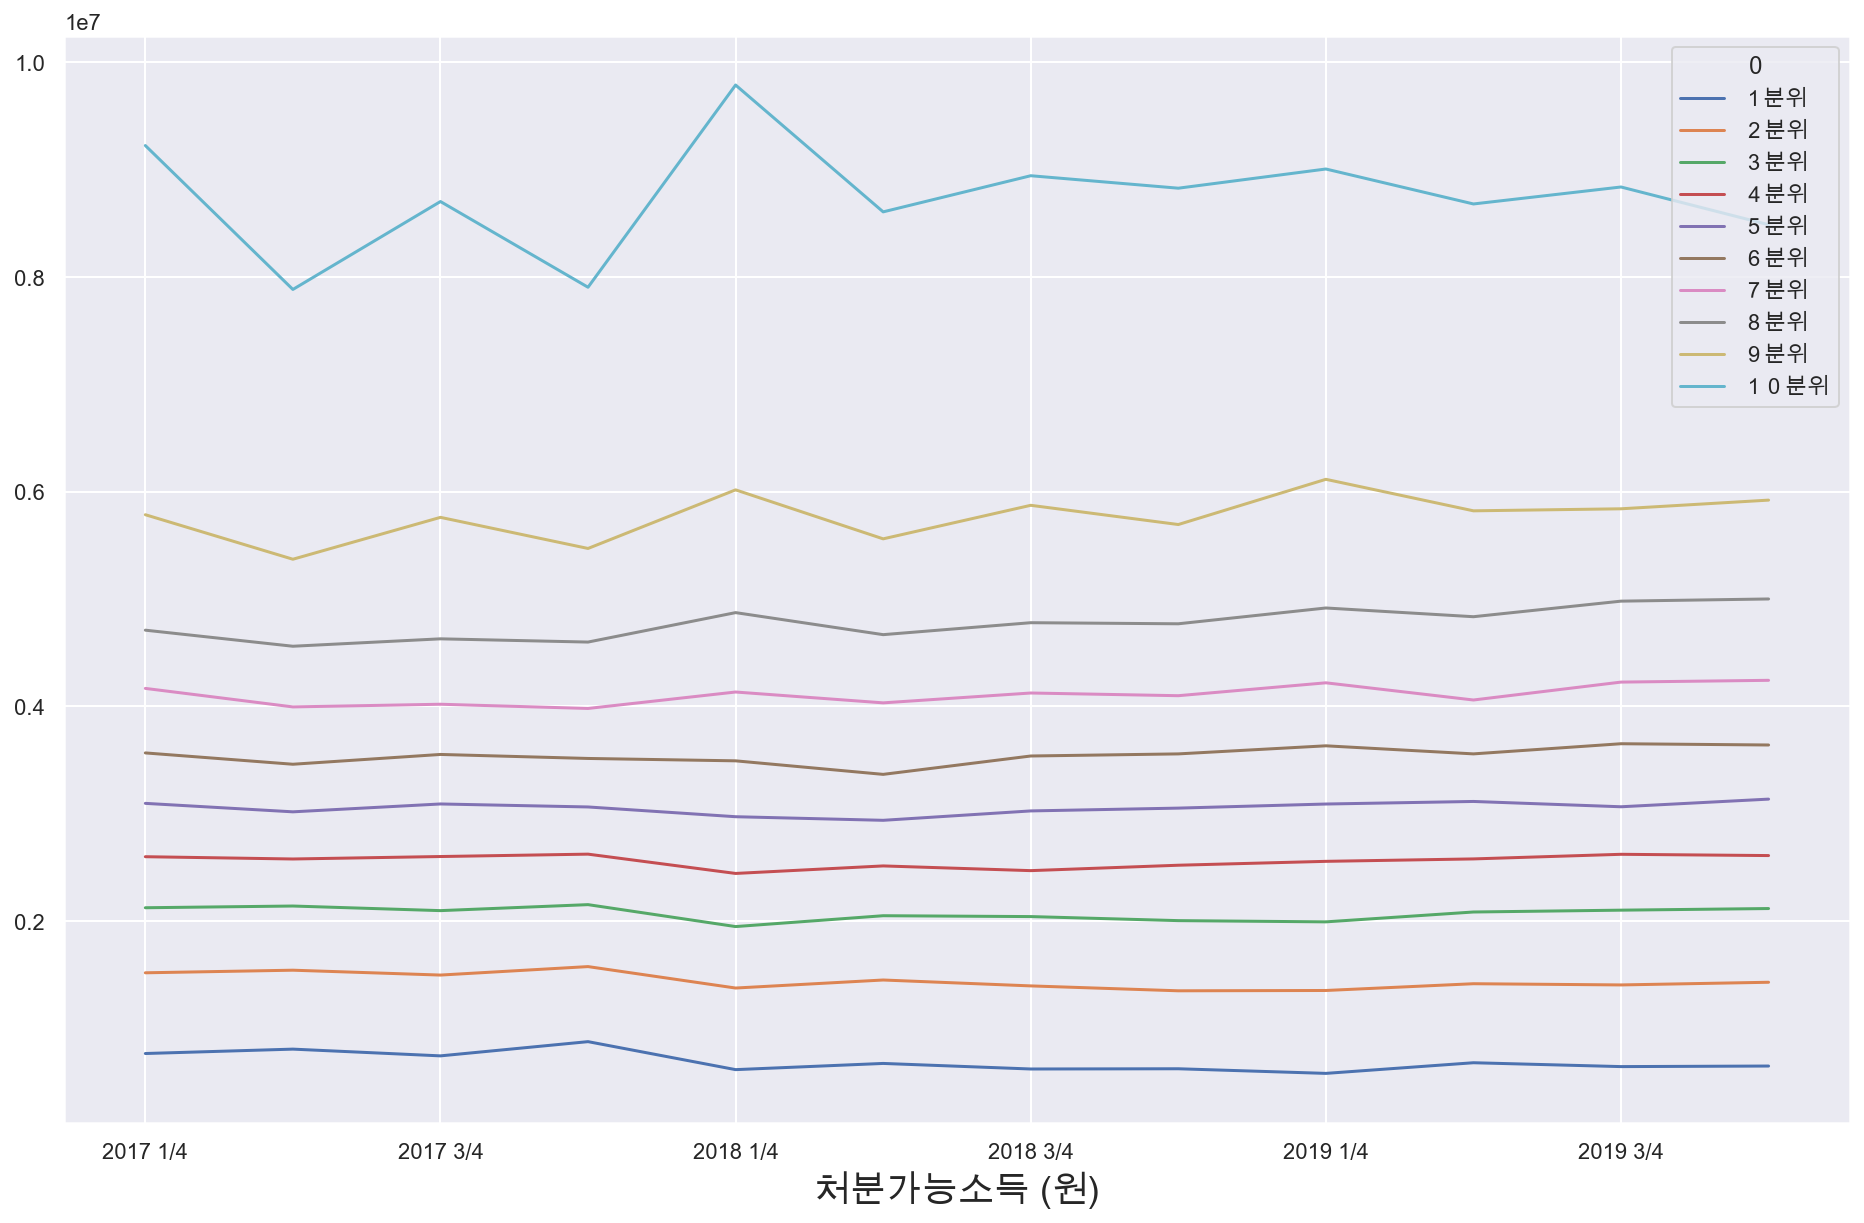

In [26]:
## 소득
for index in index_list:
    income_decile_tmp = income_decile_t.loc[:,income_decile_t.columns == index].join(income_decile_t['가계수지항목별'])
    income_decile_tmp.columns = income_decile_tmp.iloc[0]
    income_decile_tmp = income_decile_tmp.drop(columns='전체  평균')
    income_decile_tmp = income_decile_tmp.drop(0)
    income_decile_tmp.plot(x='월소득10분위별');
    plt.xlabel(index, fontsize=18)